# <center>Final Project : <br>Sign Language Classifier with Real-time Recognition</center>

#### 107061234 張博閔  107061252吳書磊
***

## <font color=#FF0000>Project Description</font>

　　這是一個分類American Sign Language(ASL)的classifier，ASL是一個被北美洲、中美洲居民所廣泛使用的一種手勢語言，裡面包含26個字母(A~Z)的手勢。在這份project當中，我們從Kaggle上找尋了兩個Dataset，一個是彩色的圖片，另外一個則是黑白的圖片。我們用了CNN演算法做影像辨識，並做了黑白以及彩色版本的model，反覆修正得到最佳的model後，使用`openCV`套件開啟筆電鏡頭，做即時的手勢辨識，並將辨識結果直接顯示於截圖的照片上方，並透過辨識結果來評估這個model的優缺點。

## <font color=#FF0000>ASL Classifier(Gray)</font>

### <u>Implementation</u>

* Data Preprocessing<br>
  1.圖片之前置處理(第一個dataset)<br>
    (1)有26個字母，每個字母有3000張圖片，建立26個list(pathA-pathZ)，每個list裡面存放3000個檔案路徑。最後合併這26個list成一個含有78000個檔案路徑的list(path)<br>
    (2)由於有26個字母，所以產生26種label(0-25)，每種label有3000個，儲存在list當中(label)<br>
    (3)將label以及path這兩個list合併，並轉成Data Frame的格式，叫做data<br>
    (4)將data這個Data Frame轉成numpy的格式<br>
    (5)利用cv2這個套件讀取所有圖片，先將圖片轉為灰階，再resize成28X28，最後轉換為pixel存放在arr這個numpy陣列中<br>
    (6)將label與pixel進行合併<br>
  2.利用pandas套件讀取第二個dataset之csv檔案<br>
  3.合併已經處理過的第一個dataset以及第二個dataset，成為一個新的dataset，並輸出成一個csv檔案，這樣之後就可以直接讀取檔案不必重新跑一次preprocessing的流程<br>
* 利用CNN演算法進行分類<br>
  1.前置處理<br>
   (1)將比較主要會使用的套件先引進(tensorflow、numpy等)<br>
   (2)將剛剛輸出完的csv檔案利用pandas套件讀進來，並將其分割為pixel以及label<br>
   (3)將label輸出出來看一下，是否有26種(0-25)<br>
  2.把所有字母的第一張照片都以黑白的方式印出來確認一下是否資料沒有錯誤<br>
  3.Feature scaling and splitting<br>
   (1)將所有pixel進行標準化<br>
   (2)先以8:2的比例將原資料先做train、test的分割<br>
   (3)再以8:2的比例針對剛剛分割完的train資料進行train、validation的分割<br>
  4.Reshape pixel array and label one hot encoding<br>
   (1)將train、validation、test的資料reshape為4-dimension的資料<br>
   (2)將所有label轉換成one hot的形式<br>
  5.建立CNN model<br>
   (1)先給定一個初始值，以及賦予convolution layer、pooling layer、dropout layer等等的<br>
   (2)進行model之訓練，並觀察loss以及accuracy隨著epoch的變化<br>
   (3)分析該模型的優缺點，針對缺失去修正，並反覆進行<br>
   (4)在報告中我們留下三個模型做探討<br>
  6.利用最終版本的model，繪製出confusion matrix，加上test data的accuracy去進行model之效能分析，最後將幾個分類錯誤的資料印出來看看<br>
* Real-time辨識<br>
  1.最後利用openCV這個套件，打開筆電鏡頭。設定每0.1秒截一張圖片，每五秒對圖片進行分類一次並印出該張圖片以及分類出來的結果<br>
  2.評估real-time的辨識結果以及這個model的優缺點

### <font color=#0000FF>Data Preprocessing</font>

#### 建立所有字母圖片之檔案路徑的list，共26個list，每個list有3000筆資料(第一個dataset)

In [1]:
import numpy as np

pathA = []
pathB = []
pathC = []
pathD = []
pathE = []
pathF = []
pathG = []
pathH = []
pathI = []
pathJ = []
pathK = []
pathL = []
pathM = []
pathN = []
pathO = []
pathP = []
pathQ = []
pathR = []
pathS = []
pathT = []
pathU = []
pathV = []
pathW = []
pathX = []
pathY = []
pathZ = []
cnt = int(1)

for i in range(3000):
    pathA.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/A/A' + str(cnt) + '.jpg')
    pathB.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/B/B' + str(cnt) + '.jpg')
    pathC.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/C/C' + str(cnt) + '.jpg')
    pathD.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/D/D' + str(cnt) + '.jpg')
    pathE.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/E/E' + str(cnt) + '.jpg')
    pathF.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/F/F' + str(cnt) + '.jpg')
    pathG.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/G/G' + str(cnt) + '.jpg')
    pathH.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/H/H' + str(cnt) + '.jpg')
    pathI.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/I/I' + str(cnt) + '.jpg')
    pathJ.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/J/J' + str(cnt) + '.jpg')
    pathK.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/K/K' + str(cnt) + '.jpg')
    pathL.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/L/L' + str(cnt) + '.jpg')
    pathM.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/M/M' + str(cnt) + '.jpg')
    pathN.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/N/N' + str(cnt) + '.jpg')
    pathO.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/O/O' + str(cnt) + '.jpg')
    pathP.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/P/P' + str(cnt) + '.jpg')
    pathQ.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/Q/Q' + str(cnt) + '.jpg')
    pathR.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/R/R' + str(cnt) + '.jpg')
    pathS.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/S/S' + str(cnt) + '.jpg')
    pathT.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/T/T' + str(cnt) + '.jpg')
    pathU.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/U/U' + str(cnt) + '.jpg')
    pathV.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/V/V' + str(cnt) + '.jpg')
    pathW.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/W/W' + str(cnt) + '.jpg')
    pathX.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/X/X' + str(cnt) + '.jpg')
    pathY.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/Y/Y' + str(cnt) + '.jpg')
    pathZ.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/Z/Z' + str(cnt) + '.jpg')
    cnt += 1


path = np.hstack((pathA, pathB, pathC, pathD, pathE, pathF, pathG, pathH, pathI, pathJ, pathK,
                 pathL, pathM, pathN, pathO, pathP, pathQ, pathR, pathS, pathT, pathU, pathV,
                 pathW, pathX, pathY, pathZ)).T


#### 將A-Z之label定義為數字0~25，並產生符合dataset數目的label，有26種label，每種label有3000個。並產生一個label之list。

In [2]:
import numpy as np

label = []

for j in range(26):
    for i in range(3000):
        label.append(j)

#### 合併label與檔案路徑這兩個list，並轉換成DataFrame，最後印出來看看是否正確。

In [3]:
import pandas as pd

data_fixed = np.vstack((label, path)).T

data = pd.DataFrame(data_fixed)

data

,0,1
0,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
1,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
2,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
3,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
4,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
...,...,...
77995,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
77996,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
77997,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
77998,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...


#### 將data的格式從DataFrame -> Numpy

In [4]:
new = np.array(data)

#### 利用cv2套件將圖片轉換成pixel，先resize為28X28，再轉成灰階(注意是BGR->GARY)，最後放進arr陣列(下方輸出的數字為檢查轉換進度)

In [5]:
import cv2
import matplotlib.pyplot as plt

arr = np.zeros((78000,28,28))
arr = arr.astype(int)


for i in range(78000):
    img = cv2.imread(new[i][1], 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)
    arr[i] = img
    if i % 500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500


#### 將原本的data這個DataFrame去除檔案路徑這個column，重新命名為df

In [6]:
df = data.drop([1], axis=1)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
77995,25
77996,25
77997,25
77998,25


#### 將pixel這個array做reshape，變成有78000筆784個pixel的資料(78000X784)，並將reshape過後的numpy array轉換成DataFrame的格式。印出來檢查一下是否有誤。

In [7]:
arr = arr.reshape((78000,784))
df1 = pd.DataFrame(arr)
df1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,41,45,48,54,56,54,52,48,42,47,...,132,132,130,130,130,130,129,127,125,110
1,40,46,48,53,57,54,52,47,41,46,...,133,132,130,130,130,130,129,128,125,109
2,41,45,48,52,56,54,53,47,41,45,...,132,132,130,130,130,130,129,128,125,109
3,41,45,48,53,57,54,53,47,41,47,...,132,131,129,130,130,130,129,128,125,109
4,41,46,48,53,55,54,53,47,41,46,...,132,132,130,130,130,130,129,128,125,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,89,109,102,95,87,80,74,69,64,60,...,151,152,153,155,157,158,157,156,113,84
77996,89,108,102,94,87,80,74,68,64,61,...,151,152,154,155,157,158,157,156,107,76
77997,89,108,103,95,87,80,74,68,64,61,...,150,152,154,156,157,158,157,155,102,67
77998,89,109,102,95,87,80,74,69,64,60,...,151,152,154,155,157,158,158,155,97,58


#### 合併df(代表label)以及df1(代表pixel)這兩個DataFrame，重新命名為data2，並印出來檢查是否有誤。

In [8]:
data2 = pd.concat([df, df1], axis=1)
data2

,0,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,41,45,48,54,56,54,52,48,42,...,132,132,130,130,130,130,129,127,125,110
1,0,40,46,48,53,57,54,52,47,41,...,133,132,130,130,130,130,129,128,125,109
2,0,41,45,48,52,56,54,53,47,41,...,132,132,130,130,130,130,129,128,125,109
3,0,41,45,48,53,57,54,53,47,41,...,132,131,129,130,130,130,129,128,125,109
4,0,41,46,48,53,55,54,53,47,41,...,132,132,130,130,130,130,129,128,125,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,25,89,109,102,95,87,80,74,69,64,...,151,152,153,155,157,158,157,156,113,84
77996,25,89,108,102,94,87,80,74,68,64,...,151,152,154,155,157,158,157,156,107,76
77997,25,89,108,103,95,87,80,74,68,64,...,150,152,154,156,157,158,157,155,102,67
77998,25,89,109,102,95,87,80,74,69,64,...,151,152,154,155,157,158,158,155,97,58


#### 為了讓data2這個合併過後的DataFrame之index不要重複，因此先將其轉成numpy array再轉換回DataFrame的格式，命名為data5。

In [9]:
arr1 = np.array(data2)
data5 = pd.DataFrame(arr1)

#### 讀取第二個dataset，是mnist的樣式，命名為data7，並印出來檢查是否有誤。

In [11]:
data6 = pd.read_csv("sign_mnist_train.csv")
arr2 = np.array(data6)
data7 = pd.DataFrame(arr2)
data7

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


#### 將data5(代表第一個dataset)與data7(代表第二個dataset)進行合併，並命名為data8，印出來檢查試一下是否有誤。

In [12]:
data8 = pd.concat([data5, data7], axis=0)
data8

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,41,45,48,54,56,54,52,48,42,...,132,132,130,130,130,130,129,127,125,110
1,0,40,46,48,53,57,54,52,47,41,...,133,132,130,130,130,130,129,128,125,109
2,0,41,45,48,52,56,54,53,47,41,...,132,132,130,130,130,130,129,128,125,109
3,0,41,45,48,53,57,54,53,47,41,...,132,131,129,130,130,130,129,128,125,109
4,0,41,46,48,53,55,54,53,47,41,...,132,132,130,130,130,130,129,128,125,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


#### 將data8(代表合併過後之dataset)輸出為csv檔案，之後就不必反覆進行資料之前置作業。

In [13]:
data8.to_csv('ASL3_gray_28X28.csv', index=False)

### <font color=#0000FF>利用CNN演算法進行分類</font>

### <font color=#0000FF>前置處理</font>

#### 引進需要使用到的套件

In [1]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#### 讀取合併dataset過後的csv檔案，印出來檢查一下是否有誤。

In [19]:
data = pd.read_csv("ASL3_gray_28X28.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,40,44,48,53,56,54,52,47,42,...,132,132,130,130,130,130,129,127,125,110
1,0,40,46,48,53,56,54,52,47,41,...,133,132,130,130,130,130,129,128,125,109
2,0,41,45,48,52,56,54,53,47,41,...,132,132,130,130,130,130,129,128,125,109
3,0,40,45,48,53,56,54,53,47,41,...,132,131,129,130,130,130,129,128,125,109
4,0,40,46,48,53,55,54,53,47,41,...,132,132,130,130,130,130,129,128,125,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
105451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
105452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
105453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


#### 將讀取進來的資料分割為pixel(命名為datak)以及label(命名為y)。

In [20]:
datak = data.iloc[:,1:].values
y = data.iloc[:,0].values

#### 檢查label是否有26種(0-25)

In [21]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

#### 26種label各印出一張圖片，檢查是否有誤

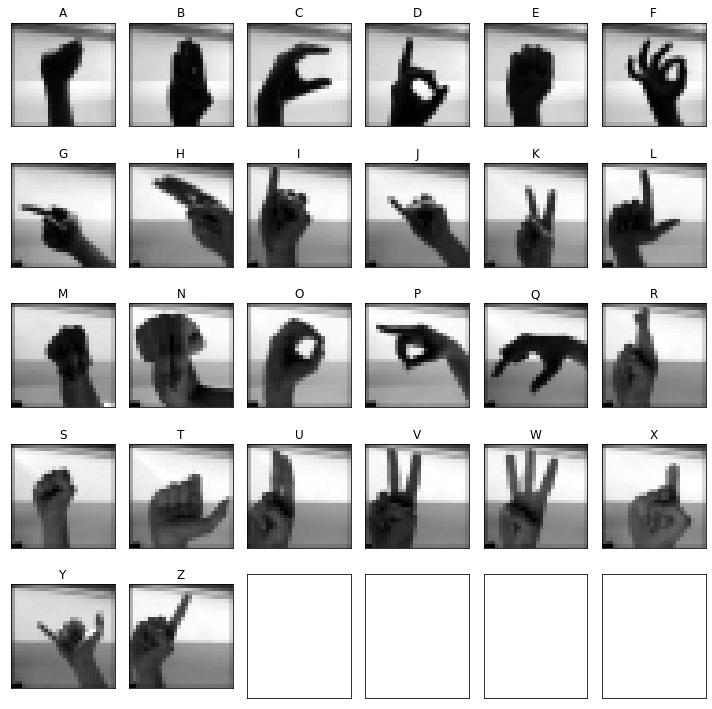

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True,)
fig.set_size_inches(10,10)
ax = ax.flatten()
for i in range(26):
    img = datak[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(chr(i+65))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### <font color=#0000FF>Feature Scaling and splitting</font>

#### 將資料進行正規化(除以255，因像素值介於0到255)

In [6]:
datak = datak / 255

datak.shape

(105455, 784)

#### 先以8:2的比例將原資料先做train、test的分割，再以8:2的比例針對剛剛分割完的train資料進行train、validation的分割。

In [7]:
from sklearn.model_selection import train_test_split

X1_train, X_test, y1_train, y_test = train_test_split(datak, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X1_train, y1_train, test_size=0.2, random_state=1, stratify=y1_train)

#### 檢查train data的size

In [8]:
X_train.shape

(67491, 784)

#### 檢查validation data的size

In [9]:
X_valid.shape

(16873, 784)

#### 檢查test data的size

In [10]:
X_test.shape

(21091, 784)

### <font color=#0000FF>Reshpae pixel array and label one hot encoding</font>

#### 為了保存沒有做one hot encoding的test data之label，因此設定一個y_test_temp

In [11]:
y_test_temp = y_test

#### 將train、validation、test的label進行one hot之encoding

In [12]:
X_train = X_train.reshape(X_train.shape[0],28, 28).astype('float64')
X_valid = X_valid.reshape(X_valid.shape[0],28, 28).astype('float64')
X1_test = X_test.reshape(X_test.shape[0],28, 28).astype('float64')


num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_valid = np.array(y_valid).reshape(-1)
y1_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_valid = np.eye(num_classes)[y_valid]
y_test = np.eye(num_classes)[y1_test]

#### 將train、validation、test的資料進行reshape，變成4-dimension的資料。

In [13]:
X_train = X_train.reshape((67491, 28, 28, 1))
X_valid = X_valid.reshape((16873, 28, 28, 1))
X_test = X1_test.reshape((21091, 28, 28, 1))

### <font color=#0000FF>建立CNN model(第一版)</font>

#### 給定兩層convolution layer、pooling layer、一層hidden layer以及一層dropout。將model命名為classifier，並印出model之summary。

In [14]:
# Build CNN model

classifier = tf.keras.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

classifier.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',
                                      activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
classifier.add(tf.keras.layers.Dense(128, activation='relu'))

classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dense (Dense)                (None, 3, 3, 128)         4224      
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

#### 訓練model

In [15]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = classifier.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_valid, y_valid))

Train on 67491 samples, validate on 16873 samples
Epoch 1/30
67491/67491 [==============================] - 6s 85us/sample - loss: 2.0864 - accuracy: 0.3791 - val_loss: 1.5752 - val_accuracy: 0.6037
Epoch 2/30
67491/67491 [==============================] - 4s 56us/sample - loss: 1.1939 - accuracy: 0.6255 - val_loss: 1.1640 - val_accuracy: 0.7098
Epoch 3/30
67491/67491 [==============================] - 4s 56us/sample - loss: 0.8895 - accuracy: 0.7150 - val_loss: 0.9245 - val_accuracy: 0.7792
Epoch 4/30
67491/67491 [==============================] - 4s 56us/sample - loss: 0.7182 - accuracy: 0.7679 - val_loss: 0.7886 - val_accuracy: 0.8029
Epoch 5/30
67491/67491 [==============================] - 4s 56us/sample - loss: 0.6074 - accuracy: 0.8022 - val_loss: 0.6573 - val_accuracy: 0.8461
Epoch 6/30
67491/67491 [==============================] - 4s 56us/sample - loss: 0.5273 - accuracy: 0.8276 - val_loss: 0.5935 - val_accuracy: 0.8557
Epoch 7/30
67491/67491 [==============================] 

#### 繪製loss以及accuracy的曲線並觀察其隨epoch的變化

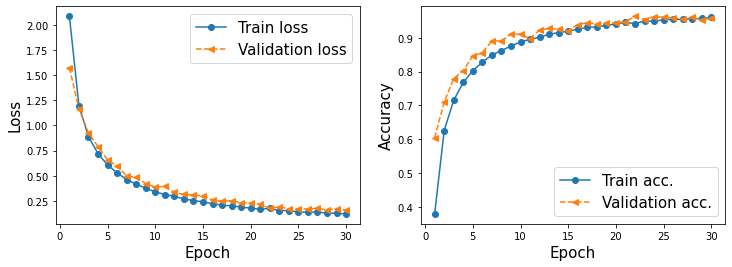

In [16]:
hist1 = history.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

#### 分類test data並計算出accuracy

In [17]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

21091/21091 [==============================] - 2s 72us/sample - loss: 0.1583 - accuracy: 0.9602
Accuracy:  0.9601726


### <font color=#0000FF>建立CNN model(第二版)</font>

#### 針對缺失(於discussion中探討)，進行以下修正。增加filter數目以增加model複雜度，並重新建立一個model，命名為classifier1，印製出model的summary。

In [18]:
# Build CNN model

classifier1 = tf.keras.Sequential()
classifier1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier1.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier1.add(tf.keras.layers.Dropout(0.5))
classifier1.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))
classifier1.add(tf.keras.layers.Dense(128, activation='relu'))

classifier1.add(tf.keras.layers.Flatten())
classifier1.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 3, 3, 128)         8320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

#### 訓練model

In [19]:
classifier1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = classifier1.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_valid, y_valid))

Train on 67491 samples, validate on 16873 samples
Epoch 1/30
67491/67491 [==============================] - 6s 90us/sample - loss: 1.9611 - accuracy: 0.4094 - val_loss: 1.4896 - val_accuracy: 0.5959
Epoch 2/30
67491/67491 [==============================] - 5s 77us/sample - loss: 1.0090 - accuracy: 0.6822 - val_loss: 1.0039 - val_accuracy: 0.7493
Epoch 3/30
67491/67491 [==============================] - 5s 77us/sample - loss: 0.7129 - accuracy: 0.7705 - val_loss: 0.7574 - val_accuracy: 0.8224
Epoch 4/30
67491/67491 [==============================] - 5s 77us/sample - loss: 0.5499 - accuracy: 0.8223 - val_loss: 0.6031 - val_accuracy: 0.8651
Epoch 5/30
67491/67491 [==============================] - 5s 77us/sample - loss: 0.4441 - accuracy: 0.8548 - val_loss: 0.5094 - val_accuracy: 0.8925
Epoch 6/30
67491/67491 [==============================] - 5s 77us/sample - loss: 0.3729 - accuracy: 0.8765 - val_loss: 0.4314 - val_accuracy: 0.9026
Epoch 7/30
67491/67491 [==============================] 

#### 繪製loss以及accuracy的曲線並觀察其隨epoch的變化

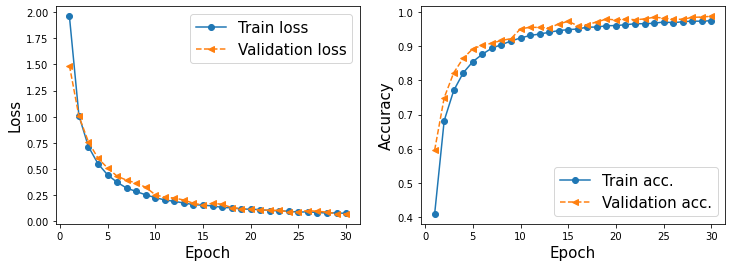

In [20]:
hist1 = history1.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

#### 分類test data並計算出accuracy

In [21]:
accuracy = classifier1.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

21091/21091 [==============================] - 2s 77us/sample - loss: 0.0699 - accuracy: 0.9861
Accuracy:  0.9861078


### <font color=#0000FF>建立CNN model(最終版)</font>

#### 針對缺失(於discussion中探討)，進行以下修正。移動dropout layer的位置，並調整model複雜度。建立一個新的model，命名為classifier2，印製出model之summary。

In [22]:
# Build CNN model

classifier2 = tf.keras.Sequential()
classifier2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

classifier2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier2.add(tf.keras.layers.Dense(64, activation='relu'))

classifier2.add(tf.keras.layers.Flatten())
classifier2.add(tf.keras.layers.Dropout(0.5))
classifier2.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dense_4 (Dense)              (None, 7, 7, 64)          2112      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3136)             

#### 訓練model

In [23]:
classifier2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = classifier2.fit(X_train, y_train, epochs=30, batch_size=100, validation_data=(X_valid, y_valid))

Train on 67491 samples, validate on 16873 samples
Epoch 1/30
67491/67491 [==============================] - 5s 67us/sample - loss: 2.1279 - accuracy: 0.3732 - val_loss: 1.2529 - val_accuracy: 0.6454
Epoch 2/30
67491/67491 [==============================] - 4s 59us/sample - loss: 1.1367 - accuracy: 0.6514 - val_loss: 0.7730 - val_accuracy: 0.7773
Epoch 3/30
67491/67491 [==============================] - 4s 56us/sample - loss: 0.8037 - accuracy: 0.7491 - val_loss: 0.5291 - val_accuracy: 0.8578
Epoch 4/30
67491/67491 [==============================] - 4s 58us/sample - loss: 0.6359 - accuracy: 0.7979 - val_loss: 0.4038 - val_accuracy: 0.8920
Epoch 5/30
67491/67491 [==============================] - 4s 57us/sample - loss: 0.5296 - accuracy: 0.8311 - val_loss: 0.3167 - val_accuracy: 0.9202
Epoch 6/30
67491/67491 [==============================] - 4s 57us/sample - loss: 0.4554 - accuracy: 0.8529 - val_loss: 0.2666 - val_accuracy: 0.9300
Epoch 7/30
67491/67491 [==============================] 

#### 繪製loss以及accuracy的曲線並觀察其隨epoch之變化

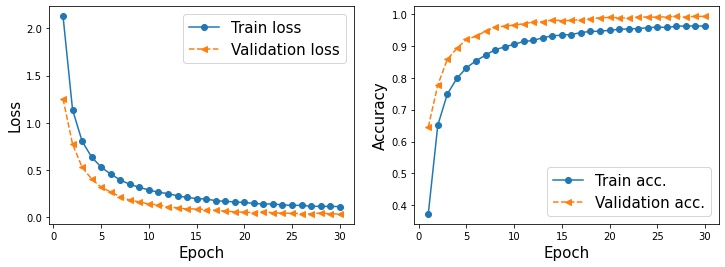

In [24]:
hist1 = history2.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

#### 分類test data並計算出accuracy

In [25]:
accuracy = classifier2.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

21091/21091 [==============================] - 1s 71us/sample - loss: 0.0323 - accuracy: 0.9926
Accuracy:  0.9926035


#### 繪製confusion matrix

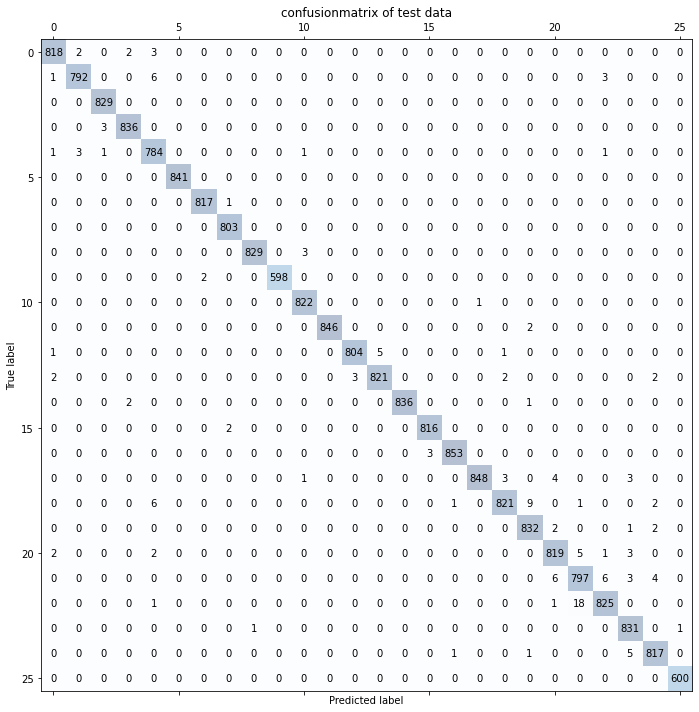

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = classifier2.predict(X_test)

predict_labels = []
for pred in y_pred:
    predict_labels.append(np.argmax(pred))

confmat = confusion_matrix(y_true=y_test_temp, y_pred=predict_labels)

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('confusionmatrix of test data')
plt.tight_layout()
plt.show()

#### 轉換predict_labels之格式，變成numpy array

In [27]:
ypred = np.array(predict_labels)
ypred

array([ 7, 18, 19, ..., 19, 24, 21], dtype=int64)

#### 印出幾個分類錯誤的圖片出來看看

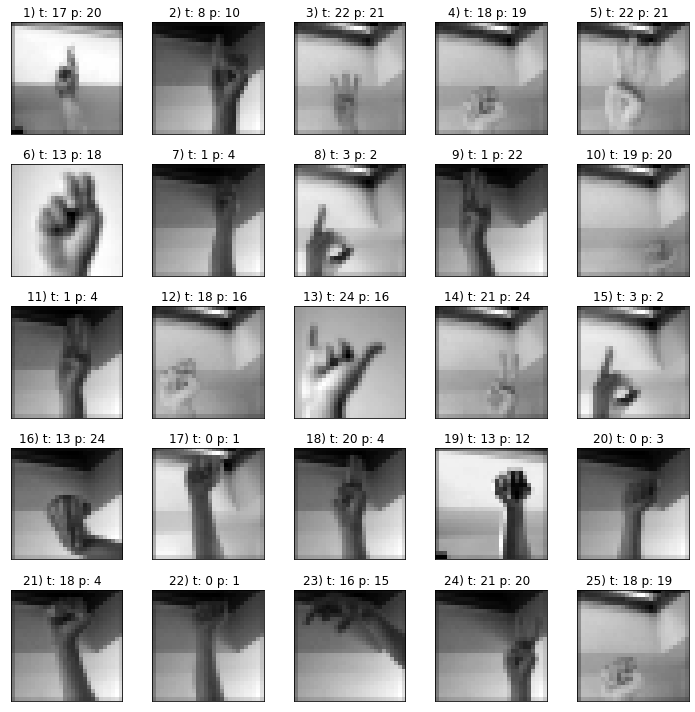

In [28]:
miscl_img = X_test[y_test_temp != ypred][:25]
correct_lab = y_test_temp[y_test_temp != ypred][:25]
miscl_lab = ypred[y_test_temp != ypred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
fig.set_size_inches(10,10)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28, 1)
    ax[i].imshow(img, cmap='gray',interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d  ' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

#### 儲存最佳的model以便之後直接使用

In [29]:
classifier2.save('model_gray.h5',
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

### <u>Discussion-Gray</u>

#### Data Preprocessing:
　　圖片在資料的處理上其實會比較麻煩一點。<br>
1.第一個問題是要怎麼一次讀取大量的圖片，我們的方法則是先將所有的圖片路徑都列出來，然後再一張一張讀進來，讀進來的同時，直接轉換成pixel並放進array裡面儲存。但是，cv2讀取進來的pixel會是以BGR的方式排列，並不是我們一般常見RGB形式，在寫code的時候要特別小心。<br>
2.第二個問題，numpy在建立array的時候會是以浮點數的方式，而pixel是以整數的方式儲存，所以若要以numpy array來儲存轉換出來的pixel的話，要先將array的type轉換成整數形式。<br>
3.第三個問題，Dataframe在合併的時候，他的index是會依照原本DataFrame上的index去合併，所以在合併過後的DataFrame上面就有可能會出現重複的index，雖然是不影響操作，但是為了以防萬一，我們還是將這個問題給解決了。而我們的做法就是，將該DataFrame先轉換成一個numpy array，再轉換回DataFrame，這樣子index就會完全按照順序來了。<br>

#### Feature Scaling and Splitting:
1.將pixel都做normalization，讓值都落在0到1之間。<br>
2.這個dataset的數量基本上非常龐大，大約有10萬張圖片，每個字母大概都有幾千張不同光線、不同角度的圖片，為了要確保他有好的分辨能力，因此我讓train data的數量維持在6-7萬張左右，test data以及validation data大約都1-2萬張左右。<br>

#### Model Train and Evaluate:
1.classifier:<br>
　　這個model我們先放了兩個convolution layer(filter設定為32、64)、兩個pooling layer、一個dropout層以及一個hidden layer(神經元個數設定為128)，除了output那層的activation fumxtion是softmax以外，其他均為relu。訓練完這個model以後，觀察了一下loss以及accuracy的曲線，大致上沒有overfitting的現象。實際分類了一下test data，發現accuracy已經到達了95%，不過我們認為這個model還有進步的空間，我們猜想有可能是因為圖片的數量龐大，模型不夠複雜使的model能夠支撐住。<br> 
2.classifier1:<br>
　　因此我們對這個model的修正就是將其convolution layer的filter數目提高，變成32以及64個，其餘變因都不變。訓練完這個model以後，觀察了一下loss以及accuracy的曲線，大致上沒有overfitting的現象出現。也實際分類了一下test data，發現這時候accuracy已經達到98%了，基本上已經達到一個很完善的地步。但是這時候我們發現了一個現象，那就是validation的曲線開始有點比train還要高了，我們覺得有可能是因為我們在兩組convolution layer、pooling layer之間放了一個dropout的關係，才會導致這樣的結果<br>
3.classifier3:<br>
　　因此我們對這個model的修正就是，將dropout layer放到flatten之後，不過在前面把dropout拿掉以後，我們怕這樣的filter個數以及hidden layer的神經元個數會造成model太複雜，因此又將這幾個的個數下修。訓練完這個model以後，觀察了一下validation的曲線，他比accuracy高了許多。而實際分類了一下test data，我們發現accuracy來到了99%，基本上已經分類的非常完美了。因此最後選擇使用這個model作為我們Real-Time辨識來使用。<br>
4.test data預測結果分析:<br>
　　我們實際印出了一下confusion matrix，我們發現當中字母"E"很容易被分類錯，可能是因為它的形狀太像拳頭了，所以被誤認為其他字母。而也稍微印出了幾個例子來看看到底分類錯誤了甚麼，我們稍微歸納了一下，會被分錯的通常都是拳頭類的，或像是兩指與三指的差別，會比較常被分錯，有些太細微的變化，就有可能會沒辦法被分辨出來，另外，由幾個分錯的例子中可見有些可能是因為光線不佳或角度問題而造成分類錯誤。<br>
5.loss以及accuracy曲線:<br>
&emsp;&emsp;至於為什麼會有validation的曲線高於accuracy曲線的這種現象，我們覺得可能是因為dropout layer的位置，以及其他相關的regularization才導致這種情況，但本身好像不影響model的效能。<br>
6.結論:<br>
&emsp;&emsp;在我們實作黑白版本model的時候我們發現了幾個特別的現象，首先，我們發現其實很容易就能train出不錯的結果，會有這樣的現象我們認為與資料的特性有很大的關係，一方面合併後的dataset有100000筆資料，相當充足，另一方面，每一筆資料其實都相當簡單，就是一個28X28X1大小的矩陣而已，在資料本質單一、資料量又多的情況下確實很容易就能做出不錯效果了。第二，我們發現train到最後validation accuracy相當容易超過train accuracy，這部分也存在著一些原因。由於資料量相當龐大，所以在每一個epoch的頭跟尾model都會有不小的變化，因此每一個epoch剛開始時讀到的train data之loss及accuracy會較epoch快結束時(模型優化過後)讀到的train data之loss及accuracy低，又validation data是在該epoch結束後才會被送入測試，在training資料量大時容易會有頭尾平均起來的平均效能比最後validation得到的數據來得差的狀況發生。另外，還有一個可能的原因是dropout layer的影響，因為訓練時做了dropout結果效能可能就很好了，測試時把dropout加回去是有機會得到更好的效能的。

### <font color=#0000FF>Real-time之辨識</font>

#### 將先前存好的model載入直接使用

In [2]:
classifier_new = tf.keras.models.load_model('model_gray.h5')

#### 建立儲存擷取影像的list及儲存model預測結果的list

In [14]:
realtime_pic=[]
realtime_pred=[]

#### 1.使用opencv套件開啟筆電鏡頭
#### 2.每0.1秒截一張圖fps=10(鏡頭影像有經過crop處理以縮小影像範圍)
#### 3.每五秒將一張截圖轉gray pixel、resize、normalize、丟入model中進行預測，並及時印出影像及預測結果，另外，將影像及結果丟入list中儲存
#### 4.按q時關閉筆電鏡頭

H


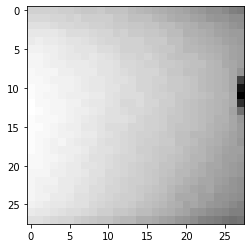

B


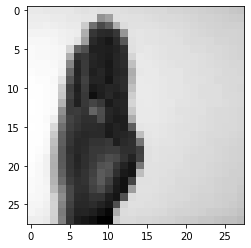

O


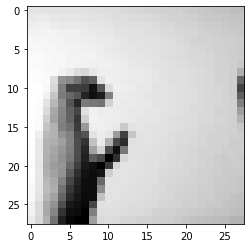

C


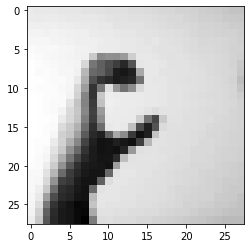

Y


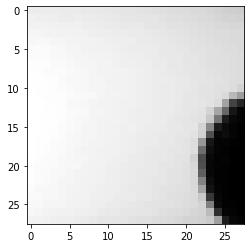

H


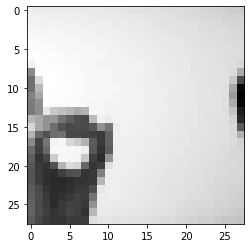

D


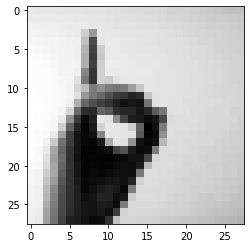

H


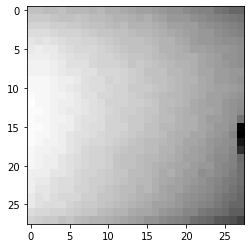

T


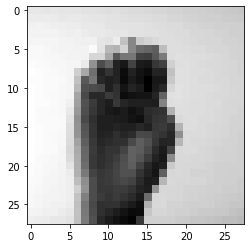

E


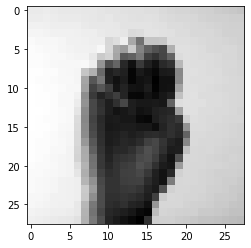

F


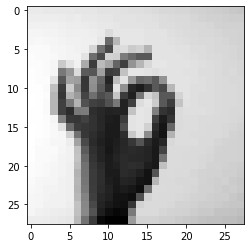

H


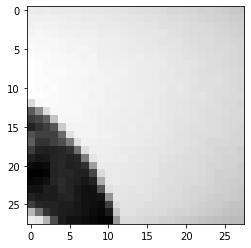

G


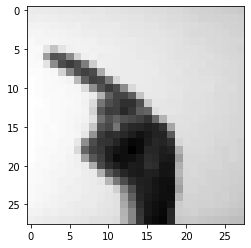

G


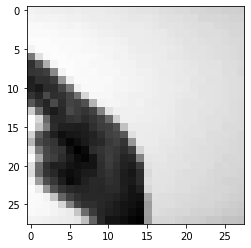

H


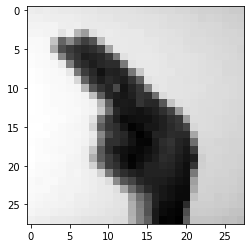

I


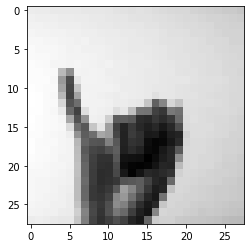

P


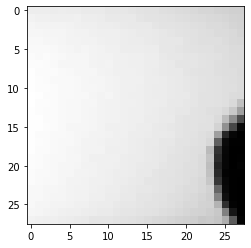

G


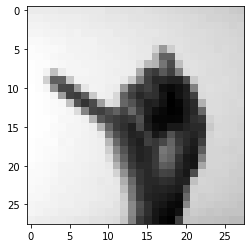

I


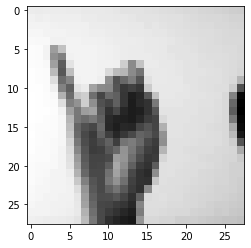

G


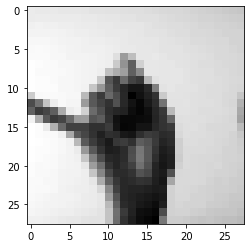

G


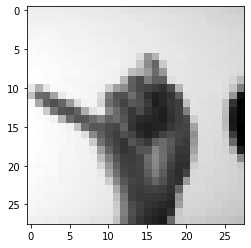

G


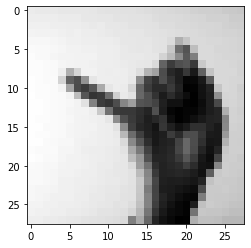

V


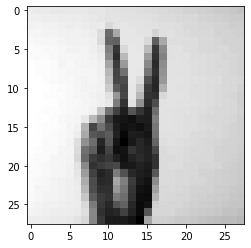

L


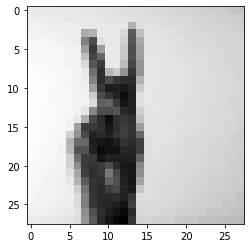

L


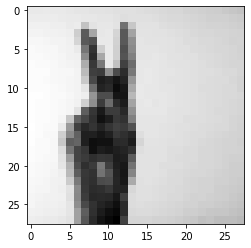

P


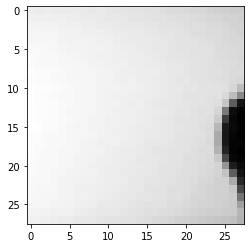

H


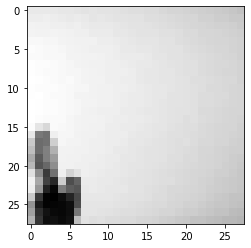

I


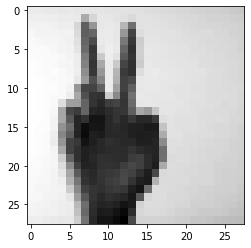

V


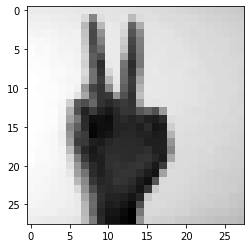

L


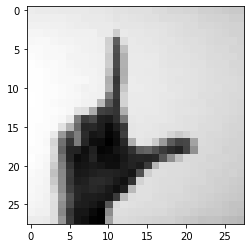

U


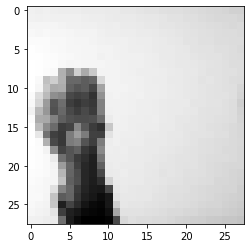

H


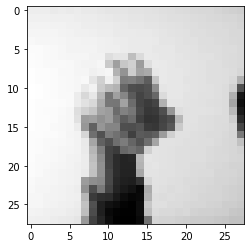

P


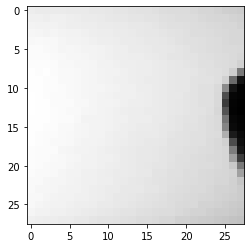

P


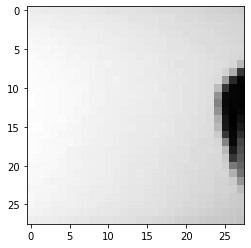

M


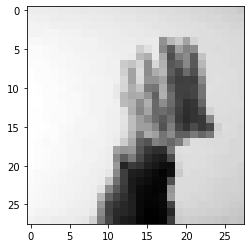

N


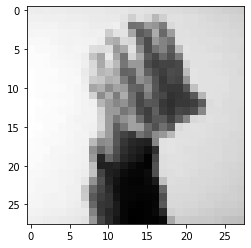

B


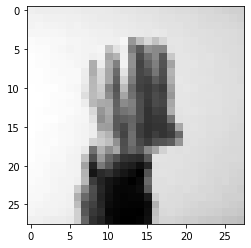

M


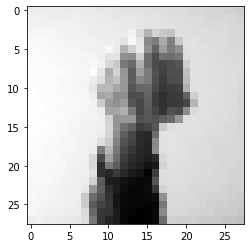

M


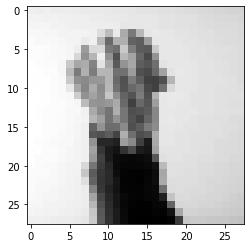

F


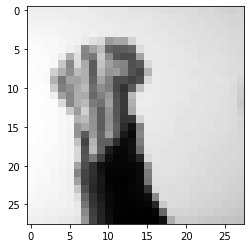

M


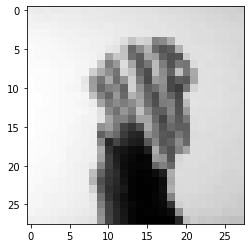

D


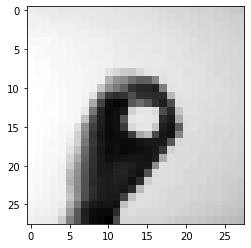

O


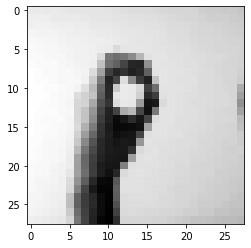

G


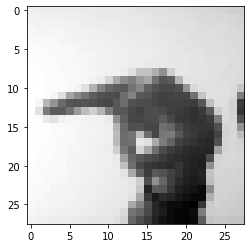

H


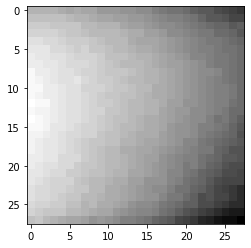

P


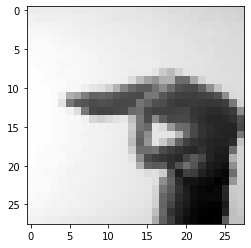

G


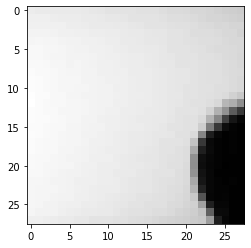

Q


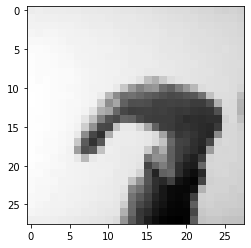

H


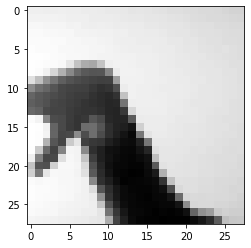

Q


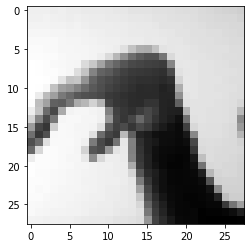

R


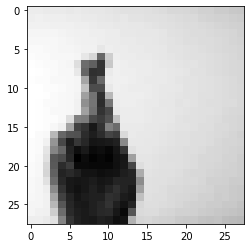

R


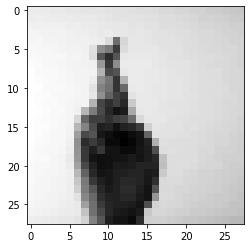

T


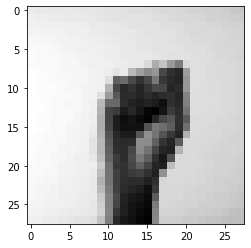

T


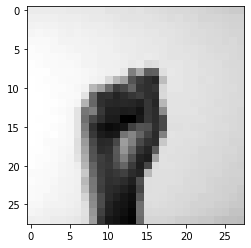

T


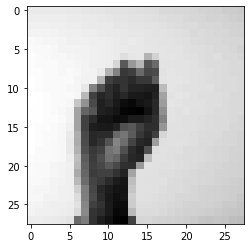

U


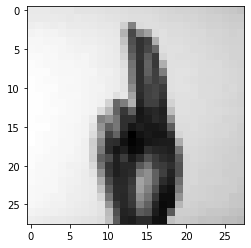

P


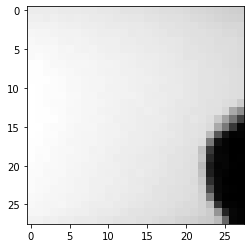

Z


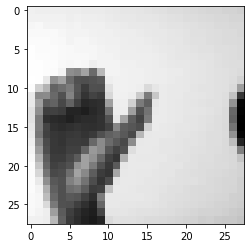

T


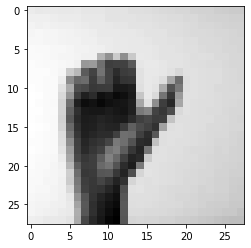

R


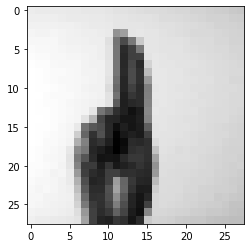

R


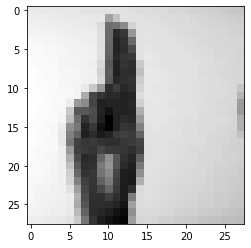

X


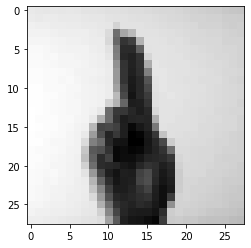

U


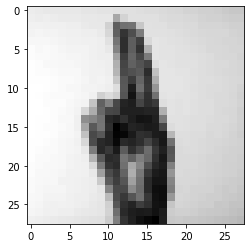

V


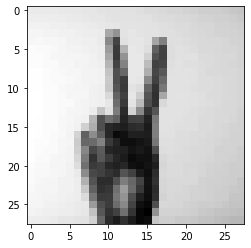

W


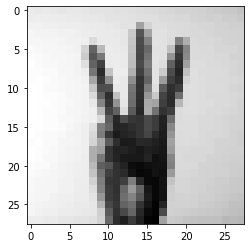

G


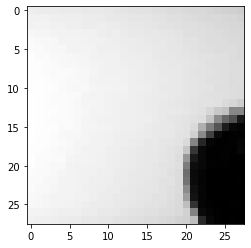

X


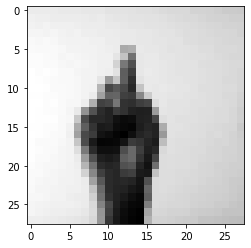

Y


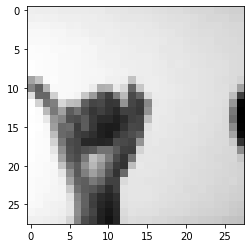

F


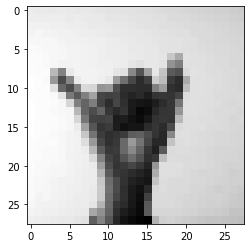

Y


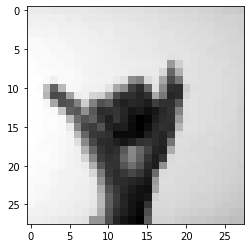

Y


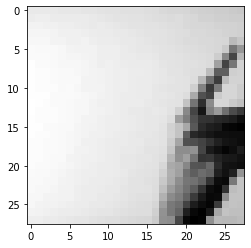

L


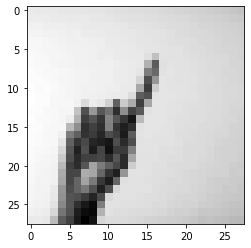

L


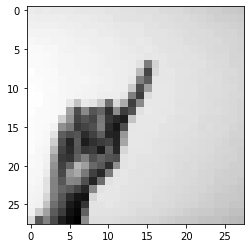

L


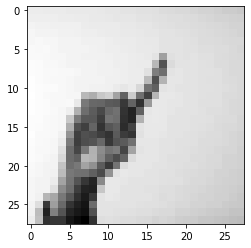

T


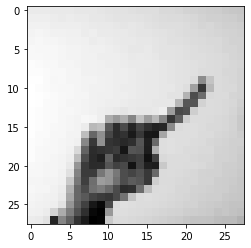

T


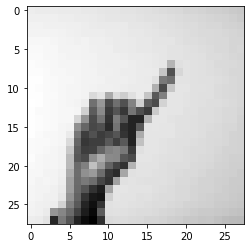

P


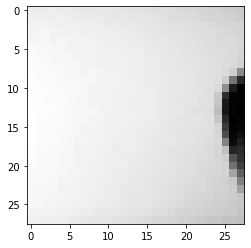

L


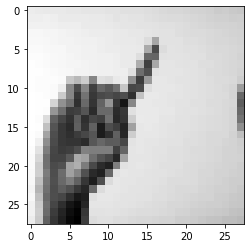

Z


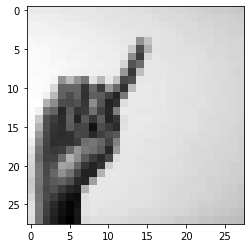

Z


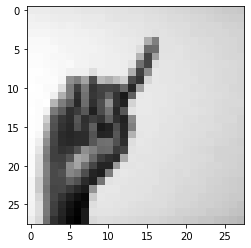

L


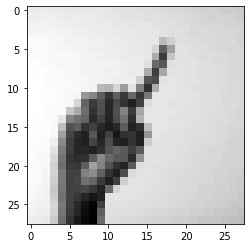

L


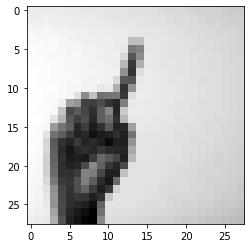

L


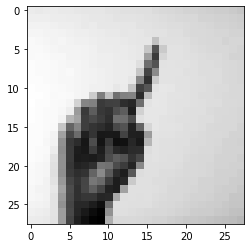

L


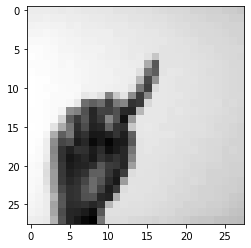

X


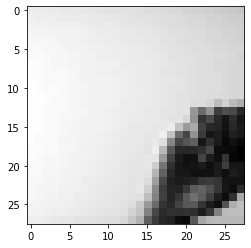

L


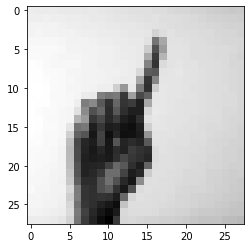

<function destroyAllWindows>

In [15]:
import cv2

cap = cv2.VideoCapture(0)
count=0

def crop_image(image, x, y, width, height):
    return image[y:y + height, x:x + width]

while(True):
    ret, frame = cap.read()
    frame = crop_image(frame, 300,180,300,300)
    if ret:
        cv2.imshow('frame', frame)
        cv2.waitKey(100)
    if count % 50 ==0:
        temp=frame
        temp2=cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(temp2, (28,28) , interpolation=cv2.INTER_AREA)
        img2 = img.reshape((1,28,28,1))
        realtime_pic.append(img)
        img3 = img2/255
        pred = classifier_new.predict_classes(img3)
        realtime_pred.append(chr(pred+65))
        print(chr(pred+65))
        plt.imshow(img, cmap='gray')
        plt.show()
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    count+=1
    
cap.release()
cv2.destroyAllWindows


#### 利用存好的list繪製在Real-time中可被辨別出的字母

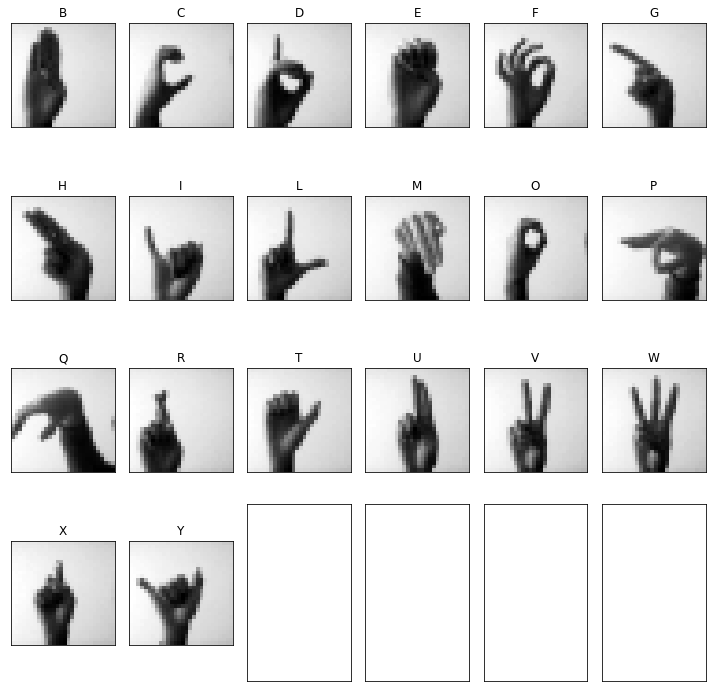

In [27]:
fig, ax = plt.subplots(nrows=4, ncols=6, sharex=True, sharey=True,)
fig.set_size_inches(10,10)
ax = ax.flatten()
ax[0].imshow(realtime_pic[1], cmap='gray')
ax[0].set_title(realtime_pred[1])
ax[1].imshow(realtime_pic[3], cmap='gray')
ax[1].set_title(realtime_pred[3])
ax[2].imshow(realtime_pic[6], cmap='gray')
ax[2].set_title(realtime_pred[6])
ax[3].imshow(realtime_pic[9], cmap='gray')
ax[3].set_title(realtime_pred[9])
ax[4].imshow(realtime_pic[10], cmap='gray')
ax[4].set_title(realtime_pred[10])
ax[5].imshow(realtime_pic[12], cmap='gray')
ax[5].set_title(realtime_pred[12])
ax[6].imshow(realtime_pic[14], cmap='gray')
ax[6].set_title(realtime_pred[14])
ax[7].imshow(realtime_pic[15], cmap='gray')
ax[7].set_title(realtime_pred[15])
ax[8].imshow(realtime_pic[29], cmap='gray')
ax[8].set_title(realtime_pred[29])
ax[9].imshow(realtime_pic[40], cmap='gray')
ax[9].set_title(realtime_pred[40])
ax[10].imshow(realtime_pic[42], cmap='gray')
ax[10].set_title(realtime_pred[42])
ax[11].imshow(realtime_pic[45], cmap='gray')
ax[11].set_title(realtime_pred[45])
ax[12].imshow(realtime_pic[49], cmap='gray')
ax[12].set_title(realtime_pred[49])
ax[13].imshow(realtime_pic[50], cmap='gray')
ax[13].set_title(realtime_pred[50])
ax[14].imshow(realtime_pic[58], cmap='gray')
ax[14].set_title(realtime_pred[58])
ax[15].imshow(realtime_pic[55], cmap='gray')
ax[15].set_title(realtime_pred[55])
ax[16].imshow(realtime_pic[63], cmap='gray')
ax[16].set_title(realtime_pred[63])
ax[17].imshow(realtime_pic[64], cmap='gray')
ax[17].set_title(realtime_pred[64])
ax[18].imshow(realtime_pic[66], cmap='gray')
ax[18].set_title(realtime_pred[66])
ax[19].imshow(realtime_pic[69], cmap='gray')
ax[19].set_title(realtime_pred[69])
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### <u>Discussion-Gray(Real-time)</u>
由以上結果可以發現當我們實際開鏡頭來分析我們比的手勢時只有20種字母可以被辨別出來，其中有困難的字母以拳頭類型為主，例如:A、N、S。我們認為可能是因為對於拳頭類型而言要分辨的是手指的細微變化，因而難度較高。雖然用原本dataset中的test data去預測時可以達到超過99%的準確度，但是dataset中的所有資料畢竟還是在類似的環境、光線下紀錄的，因此train出來的model對於不同外在條件所產生的圖片的適應力不會來地那麼好，不過總括來說能分出20種字母已經在我們的預期上。<br>
如果要改善real-time影像的辨別度，以下為我們認為可行的方法，一、加入變異度更高的data，如:不同角度、光線、背景，但這部分恐怕就需要由我們自己建立、歸類，二、使用Online Learning的方式，當我們自己的影像分類錯誤時馬上給model正確的label進行partial fit，不過同樣的，需要再有大量的資料才能讓效能提升。

## <font color=#FF0000>ASL Classifier(RGB)</font>

* Data Preprocessing<br>
  1.圖片之前置處理(此處不使用Mnist dataset，因為其本身就為灰階資料)<br>
    (1)有26個字母，每個字母有3000張圖片，建立26個list(pathA-pathZ)，每個list裡面存放3000個檔案路徑。最後合併這26個list成一個含有78000個檔案路徑的list(path)<br>
    (2)由於有26個字母，所以產生26種label(0-25)，每種label有3000個，儲存在list當中(label)<br>
    (3)將label以及path這兩個list合併，並轉成Data Frame的格式，叫做data<br>
    (4)將data這個Data Frame轉成numpy的格式<br>
    (5)利用cv2這個套件讀取所有圖片，先將圖片由BGR轉為RGB，再resize成28X28X3，最後轉換為pixel存放在arr這個numpy陣列中<br>
    (6)將label與pixel進行合併<br>
  2.因為檔案過大，所以將資料切成前、後39000筆後再分別輸出csv檔案，這樣之後就可以直接讀取檔案不必重新跑一次preprocessing的流程<br>
* 利用CNN演算法進行分類<br>
  1.前置處理<br>
   (1)將比較主要會使用的套件先引進(tensorflow、numpy等)<br>
   (2)將剛剛輸出完的兩個csv檔案利用pandas套件讀進來、進行合併，再將其分割為pixel以及label<br>
   (3)將label輸出出來看一下，是否有26種(0-25)<br>
  2.把所有字母的第一張照片都以RGB的型式印出來確認一下是否資料沒有錯誤<br>
  3.Feature scaling and splitting<br>
   (1)將所有pixel進行標準化<br>
   (2)先以9:1的比例將原資料先做train、test的分割<br>
   (3)再以9:1的比例針對剛剛分割完的train資料進行train、validation的分割<br>
  4.Reshape pixel array and label one hot encoding<br>
   (1)將train、validation、test的資料reshape為4-dimension的資料<br>
   (2)將所有label轉換成one hot的形式<br>
  5.建立CNN model<br>
   (1)先給定一個初始值，以及賦予convolution layer、pooling layer、dropout layer等等的<br>
   (2)進行model之訓練，並觀察loss以及accuracy隨著epoch的變化<br>
   (3)分析該模型的優缺點，針對缺失去修正，並反覆進行<br>
   (4)在報告中我們留下四個模型做探討<br>
  6.利用最終版本的model，繪製出confusion matrix，加上test data的accuracy去進行model之效能分析，最後將幾個分類錯誤的資料印出來看看<br>
* Real-time辨識<br>
  1.最後利用openCV這個套件，打開筆電鏡頭。設定每0.1秒截一張圖片，每五秒對圖片進行分類一次並印出該張圖片以及分類出來的結果<br>
  2.評估real-time的辨識結果以及這個model的優缺點

### <font color=#0000FF>Data Preprocessing</font>

#### 建立所有字母圖片之檔案路徑的list，共26個list，每個list有3000筆資料(第一個dataset)

In [32]:
import numpy as np

pathA = []
pathB = []
pathC = []
pathD = []
pathE = []
pathF = []
pathG = []
pathH = []
pathI = []
pathJ = []
pathK = []
pathL = []
pathM = []
pathN = []
pathO = []
pathP = []
pathQ = []
pathR = []
pathS = []
pathT = []
pathU = []
pathV = []
pathW = []
pathX = []
pathY = []
pathZ = []
cnt = int(1)

for i in range(3000):
    pathA.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/A/A' + str(cnt) + '.jpg')
    pathB.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/B/B' + str(cnt) + '.jpg')
    pathC.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/C/C' + str(cnt) + '.jpg')
    pathD.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/D/D' + str(cnt) + '.jpg')
    pathE.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/E/E' + str(cnt) + '.jpg')
    pathF.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/F/F' + str(cnt) + '.jpg')
    pathG.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/G/G' + str(cnt) + '.jpg')
    pathH.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/H/H' + str(cnt) + '.jpg')
    pathI.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/I/I' + str(cnt) + '.jpg')
    pathJ.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/J/J' + str(cnt) + '.jpg')
    pathK.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/K/K' + str(cnt) + '.jpg')
    pathL.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/L/L' + str(cnt) + '.jpg')
    pathM.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/M/M' + str(cnt) + '.jpg')
    pathN.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/N/N' + str(cnt) + '.jpg')
    pathO.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/O/O' + str(cnt) + '.jpg')
    pathP.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/P/P' + str(cnt) + '.jpg')
    pathQ.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/Q/Q' + str(cnt) + '.jpg')
    pathR.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/R/R' + str(cnt) + '.jpg')
    pathS.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/S/S' + str(cnt) + '.jpg')
    pathT.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/T/T' + str(cnt) + '.jpg')
    pathU.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/U/U' + str(cnt) + '.jpg')
    pathV.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/V/V' + str(cnt) + '.jpg')
    pathW.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/W/W' + str(cnt) + '.jpg')
    pathX.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/X/X' + str(cnt) + '.jpg')
    pathY.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/Y/Y' + str(cnt) + '.jpg')
    pathZ.append('D:/ML_data/asl_alphabet_train/asl_alphabet_train/Z/Z' + str(cnt) + '.jpg')
    cnt += 1


path = np.hstack((pathA, pathB, pathC, pathD, pathE, pathF, pathG, pathH, pathI, pathJ, pathK,
                 pathL, pathM, pathN, pathO, pathP, pathQ, pathR, pathS, pathT, pathU, pathV,
                 pathW, pathX, pathY, pathZ)).T


#### 將A-Z之label定義為數字0~25，並產生符合dataset數目的label，有26種label，每種label有3000個。並產生一個label之list。

In [33]:
import numpy as np

label = []

for j in range(26):
    for i in range(3000):
        label.append(j)

#### 合併label與檔案路徑這兩個list，並轉換成DataFrame，最後印出來看看是否正確。

In [34]:
import pandas as pd

data_fixed = np.vstack((label, path)).T

data = pd.DataFrame(data_fixed)

data

,0,1
0,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
1,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
2,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
3,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
4,0,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
...,...,...
77995,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
77996,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
77997,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...
77998,25,D:/ML_data/asl_alphabet_train/asl_alphabet_tra...


#### 將data的格式從DataFrame -> Numpy

In [35]:
new = np.array(data)

#### 利用cv2套件將圖片轉換成28X28X3的pixel，再由BGR轉成RGB，最後放進arr陣列(下方輸出的數字為檢查轉換進度)

In [36]:
import cv2
import matplotlib.pyplot as plt

arr = np.zeros((78000,28,28,3))
arr = arr.astype(int)


for i in range(78000):
    img = cv2.imread(new[i][1], 1)
    img = cv2.resize(img, (28,28), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    arr[i] = img
    if i % 500 == 0:
        print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500


#### 將原本的data這個DataFrame去除檔案路徑這個column，重新命名為df

In [37]:
df = data.drop([1], axis=1)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
77995,25
77996,25
77997,25
77998,25


#### 將pixel這個array做reshape，變成有78000筆784X3個column(因每個pixel有RGB三個值)的資料(78000X784X3)，並將reshape過後的numpy array轉換成DataFrame的格式。印出來檢查一下是否有誤。

In [38]:
arr = arr.reshape((78000,2352))
df1 = pd.DataFrame(arr)
df1

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,33,27,133,44,36,90,49,38,94,54,...,154,131,120,154,128,119,151,108,101,159
1,32,27,134,45,38,91,50,39,92,55,...,154,130,122,153,127,119,150,108,100,159
2,35,27,134,45,37,89,49,39,93,54,...,153,131,122,151,127,120,148,106,101,159
3,31,28,134,45,37,89,49,39,94,55,...,155,130,122,152,128,119,149,106,101,159
4,33,27,133,48,37,88,50,39,92,55,...,155,129,122,153,128,119,150,108,101,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,78,75,190,105,99,166,98,93,158,91,...,172,159,151,174,115,108,138,81,76,137
77996,78,75,190,104,100,165,98,93,158,93,...,172,159,151,174,109,102,132,73,67,130
77997,77,75,190,104,100,165,100,94,157,94,...,171,158,151,173,104,95,127,62,59,122
77998,77,76,190,105,100,164,98,93,156,93,...,173,157,151,172,98,91,123,54,49,114


#### 合併df(代表label)以及df1(代表pixel)這兩個DataFrame，重新命名為data2，並印出來檢查是否有誤。

In [39]:
data2 = pd.concat([df, df1], axis=1)
data2

,0,0,1,2,3,4,5,6,7,8,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,0,33,27,133,44,36,90,49,38,94,...,154,131,120,154,128,119,151,108,101,159
1,0,32,27,134,45,38,91,50,39,92,...,154,130,122,153,127,119,150,108,100,159
2,0,35,27,134,45,37,89,49,39,93,...,153,131,122,151,127,120,148,106,101,159
3,0,31,28,134,45,37,89,49,39,94,...,155,130,122,152,128,119,149,106,101,159
4,0,33,27,133,48,37,88,50,39,92,...,155,129,122,153,128,119,150,108,101,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,25,78,75,190,105,99,166,98,93,158,...,172,159,151,174,115,108,138,81,76,137
77996,25,78,75,190,104,100,165,98,93,158,...,172,159,151,174,109,102,132,73,67,130
77997,25,77,75,190,104,100,165,100,94,157,...,171,158,151,173,104,95,127,62,59,122
77998,25,77,76,190,105,100,164,98,93,156,...,173,157,151,172,98,91,123,54,49,114


#### 因為會發生檔案過大的問題，所以將Dataframe分為前、後39000筆資料再分別輸出成csv檔案

In [40]:
data3 = data2[0:39000]
data4 = data2[39000:78000]

#### 將兩個data分別輸出為csv檔案，之後就不必反覆進行資料之前置作業。

In [41]:
data3.to_csv('ASL1_rgb_28X28.csv', index=False)
data4.to_csv('ASL2_rgb_28X28.csv', index=False)

### <font color=#0000FF>利用CNN演算法進行分類</font>

### <font color=#0000FF>前置處理</font>

#### 引進需要使用到的套件

In [42]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#### 讀取csv檔案，印出來檢查一下是否有誤。

In [43]:
data1 = pd.read_csv("ASL1_rgb_28X28.csv")
data2 = pd.read_csv("ASL2_rgb_28X28.csv")

In [44]:
data1

,0,0.1,1,2,3,4,5,6,7,8,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,0,33,27,133,44,36,90,49,38,94,...,154,131,120,154,128,119,151,108,101,159
1,0,32,27,134,45,38,91,50,39,92,...,154,130,122,153,127,119,150,108,100,159
2,0,35,27,134,45,37,89,49,39,93,...,153,131,122,151,127,120,148,106,101,159
3,0,31,28,134,45,37,89,49,39,94,...,155,130,122,152,128,119,149,106,101,159
4,0,33,27,133,48,37,88,50,39,92,...,155,129,122,153,128,119,150,108,101,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,12,78,70,175,99,88,142,93,80,136,...,86,129,118,137,129,120,140,110,105,154
38996,12,77,70,173,101,88,140,93,80,136,...,78,130,118,138,129,121,140,110,104,154
38997,12,78,70,176,101,89,140,92,81,135,...,69,129,118,136,129,121,139,111,104,155
38998,12,77,70,174,101,89,139,92,80,134,...,60,128,118,135,129,122,138,110,104,154


#### 將兩個39000筆的資料合併回78000筆。(表格下方顯示78000 rows，因此是正確的)

In [45]:
data = pd.concat([data1, data2], axis=0)

data

,0,0.1,1,2,3,4,5,6,7,8,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,0,33,27,133,44,36,90,49,38,94,...,154,131,120,154,128,119,151,108,101,159
1,0,32,27,134,45,38,91,50,39,92,...,154,130,122,153,127,119,150,108,100,159
2,0,35,27,134,45,37,89,49,39,93,...,153,131,122,151,127,120,148,106,101,159
3,0,31,28,134,45,37,89,49,39,94,...,155,130,122,152,128,119,149,106,101,159
4,0,33,27,133,48,37,88,50,39,92,...,155,129,122,153,128,119,150,108,101,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,25,78,75,190,105,99,166,98,93,158,...,172,159,151,174,115,108,138,81,76,137
38996,25,78,75,190,104,100,165,98,93,158,...,172,159,151,174,109,102,132,73,67,130
38997,25,77,75,190,104,100,165,100,94,157,...,171,158,151,173,104,95,127,62,59,122
38998,25,77,76,190,105,100,164,98,93,156,...,173,157,151,172,98,91,123,54,49,114


#### 將讀取進來的資料分割為pixel(命名為datak)以及label(命名為y)。

In [46]:
datak = data.iloc[:,1:].values
y = data.iloc[:,0].values

#### 檢查label是否有26種(0-25)

In [47]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

#### 26種label各印出一張圖片，檢查是否有誤，以RGB形式實作會是彩圖

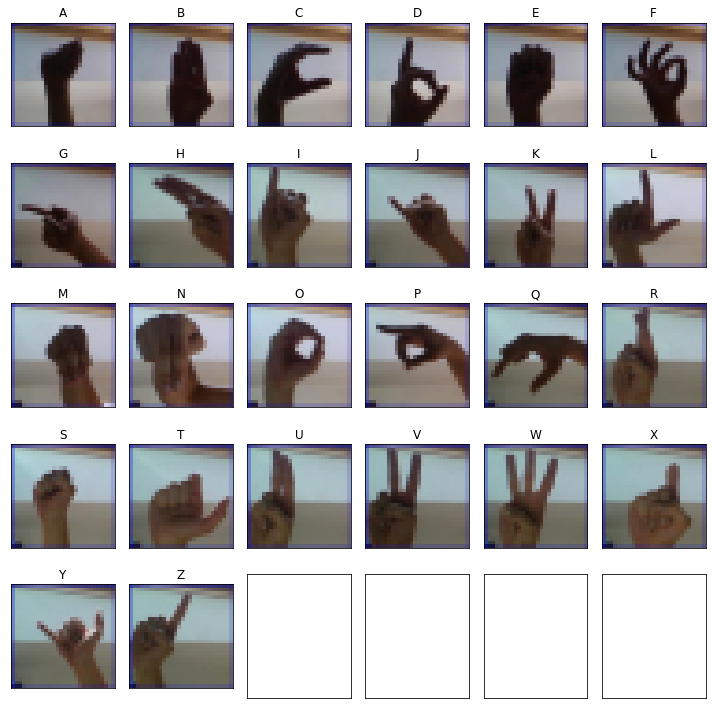

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=6, sharex=True, sharey=True,)
fig.set_size_inches(10,10)
ax = ax.flatten()
for i in range(26):
    img = datak[y == i][0].reshape(28, 28, 3)
    ax[i].imshow(img)
    ax[i].set_title(chr(i+65))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_6.png', dpi=300)
plt.show()

### <font color=#0000FF>Feature Scaling and splitting</font>

#### 將資料進行正規化(除以255，因像素值介於0到255)

In [49]:
datak = datak / 255

datak

array([[0.12941176, 0.10588235, 0.52156863, ..., 0.42352941, 0.39607843,
        0.62352941],
       [0.1254902 , 0.10588235, 0.5254902 , ..., 0.42352941, 0.39215686,
        0.62352941],
       [0.1372549 , 0.10588235, 0.5254902 , ..., 0.41568627, 0.39607843,
        0.62352941],
       ...,
       [0.30196078, 0.29411765, 0.74509804, ..., 0.24313725, 0.23137255,
        0.47843137],
       [0.30196078, 0.29803922, 0.74509804, ..., 0.21176471, 0.19215686,
        0.44705882],
       [0.29803922, 0.29411765, 0.74901961, ..., 0.17254902, 0.15294118,
        0.41176471]])

#### 以9:1的比例將原資料先做train、test的分割，再以9:1的比例針對剛剛分割完的train資料進行train、validation的分割。

In [50]:
from sklearn.model_selection import train_test_split

X1_train, X_test, y1_train, y_test = train_test_split(datak, y, test_size=0.1, random_state=1, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X1_train, y1_train, test_size=0.1, random_state=1, stratify=y1_train)

#### 檢查train data的size

In [51]:
X_train.shape

(63180, 2352)

#### 檢查validation data的size

In [52]:
X_valid.shape

(7020, 2352)

#### 檢查test data的size

In [53]:
X_test.shape

(7800, 2352)

### <font color=#0000FF>Reshpae pixel array and label one hot encoding</font>

#### 為了保存沒有做one hot encoding的test data之label，因此設定一個y_test_temp

In [54]:
y_test_temp = y_test

#### 將train、validation、test的label進行one hot之encoding

In [55]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 3).astype('float64')
X_valid = X_valid.reshape(X_valid.shape[0],28, 28, 3).astype('float64')
X1_test = X_test.reshape(X_test.shape[0],28, 28, 3).astype('float64')

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_valid = np.array(y_valid).reshape(-1)
y1_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_valid = np.eye(num_classes)[y_valid]
y_test = np.eye(num_classes)[y1_test]

#### 將train、validation、test的資料進行reshape，變成4-dimension的資料。(RGB形式，第四個dimension有3個channel)

In [56]:
X_train = X_train.reshape((63180, 28, 28, 3))
X_valid = X_valid.reshape((7020, 28, 28, 3))
X_test = X1_test.reshape((7800, 28, 28, 3))

### <font color=#0000FF>建立CNN model(第一版)</font>

#### 給定兩層convolution layer、pooling layer、兩層hidden layer以及一層dropout。將model命名為classifier，並印出model之summary。

In [57]:
# build CNN model

classifier = tf.keras.Sequential()
classifier.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,3),activation='relu', data_format='channels_last'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

classifier.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dropout(0.5))
classifier.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

#### 訓練model

In [58]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history0 = classifier.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_valid, y_valid))

Train on 63180 samples, validate on 7020 samples
Epoch 1/20
63180/63180 [==============================] - 5s 74us/sample - loss: 2.3447 - accuracy: 0.3202 - val_loss: 1.4315 - val_accuracy: 0.5868
Epoch 2/20
63180/63180 [==============================] - 3s 55us/sample - loss: 1.4804 - accuracy: 0.5627 - val_loss: 1.1043 - val_accuracy: 0.7094
Epoch 3/20
63180/63180 [==============================] - 4s 56us/sample - loss: 1.2317 - accuracy: 0.6427 - val_loss: 0.8690 - val_accuracy: 0.8060
Epoch 4/20
63180/63180 [==============================] - 3s 50us/sample - loss: 1.0818 - accuracy: 0.6907 - val_loss: 0.7606 - val_accuracy: 0.8390
Epoch 5/20
63180/63180 [==============================] - 3s 51us/sample - loss: 0.9758 - accuracy: 0.7260 - val_loss: 0.6716 - val_accuracy: 0.8578
Epoch 6/20
63180/63180 [==============================] - 3s 51us/sample - loss: 0.8940 - accuracy: 0.7513 - val_loss: 0.5852 - val_accuracy: 0.8828
Epoch 7/20
63180/63180 [==============================] -

#### 繪製loss以及accuracy的曲線並觀察其隨epoch之變化

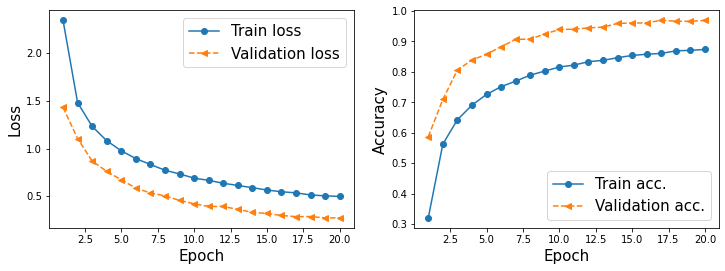

In [59]:
hist1 = history0.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

#### 分類test data並計算出accuracy

In [60]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7800/7800 [==============================] - 1s 67us/sample - loss: 0.2746 - accuracy: 0.9671
Accuracy:  0.96705127


### <font color=#0000FF>建立CNN model(第二版)</font>

#### 針對缺失(於discussion中探討)，進行以下修正。拿掉一個pooling layer。

In [61]:
# build CNN model

classifier1 = tf.keras.Sequential()
classifier1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,3),activation='relu', data_format='channels_last'))
classifier1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier1.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))


classifier1.add(tf.keras.layers.Flatten())
classifier1.add(tf.keras.layers.Dropout(0.5))
classifier1.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier1.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 2592)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               331904    
_________________________________________________________________
dense_9 (Dense)              (None, 26)               

#### 訓練model

In [62]:
classifier1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = classifier1.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_valid, y_valid))

Train on 63180 samples, validate on 7020 samples
Epoch 1/20
63180/63180 [==============================] - 5s 83us/sample - loss: 1.8743 - accuracy: 0.4895 - val_loss: 0.9867 - val_accuracy: 0.7943
Epoch 2/20
63180/63180 [==============================] - 5s 73us/sample - loss: 0.9972 - accuracy: 0.7654 - val_loss: 0.7174 - val_accuracy: 0.8717
Epoch 3/20
63180/63180 [==============================] - 5s 73us/sample - loss: 0.7747 - accuracy: 0.8359 - val_loss: 0.5475 - val_accuracy: 0.9316
Epoch 4/20
63180/63180 [==============================] - 4s 71us/sample - loss: 0.6690 - accuracy: 0.8681 - val_loss: 0.4549 - val_accuracy: 0.9590
Epoch 5/20
63180/63180 [==============================] - 5s 72us/sample - loss: 0.5893 - accuracy: 0.8909 - val_loss: 0.4070 - val_accuracy: 0.9620
Epoch 6/20
63180/63180 [==============================] - 5s 72us/sample - loss: 0.5334 - accuracy: 0.9066 - val_loss: 0.3853 - val_accuracy: 0.9613
Epoch 7/20
63180/63180 [==============================] -

#### 繪製loss以及accuracy的曲線並觀察其隨epoch之變化

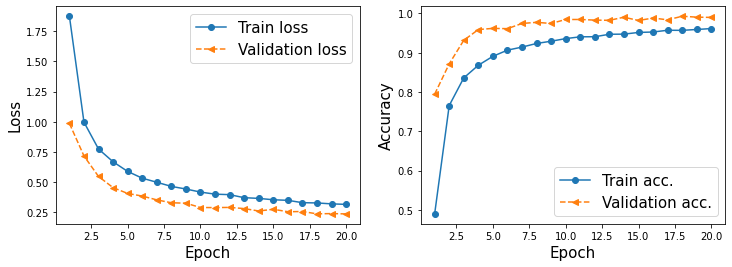

In [63]:
hist1 = history1.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

#### 分類test data並計算出accuracy

In [64]:
accuracy = classifier1.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7800/7800 [==============================] - 1s 72us/sample - loss: 0.2488 - accuracy: 0.9851
Accuracy:  0.9851282


### <font color=#0000FF>建立CNN model(第三版)</font>

#### 針對缺失(於discussion中探討)，進行以下修正。增加兩層convolution layer、一層pooling layer、一層dropout layer。

In [65]:
# build CNN model

classifier2 = tf.keras.Sequential()
classifier2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,3),activation='relu', data_format='channels_last'))
classifier2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier2.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
classifier2.add(tf.keras.layers.Dropout(0.5))

classifier2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier2.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

classifier2.add(tf.keras.layers.Flatten())
classifier2.add(tf.keras.layers.Dropout(0.5))
classifier2.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier2.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)         

#### 訓練model

In [66]:
classifier2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = classifier2.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_valid, y_valid))

Train on 63180 samples, validate on 7020 samples
Epoch 1/20
63180/63180 [==============================] - 7s 106us/sample - loss: 2.1592 - accuracy: 0.3585 - val_loss: 0.8883 - val_accuracy: 0.7705
Epoch 2/20
63180/63180 [==============================] - 5s 87us/sample - loss: 0.9749 - accuracy: 0.7080 - val_loss: 0.5061 - val_accuracy: 0.8925
Epoch 3/20
63180/63180 [==============================] - 5s 86us/sample - loss: 0.7179 - accuracy: 0.7937 - val_loss: 0.3579 - val_accuracy: 0.9358
Epoch 4/20
63180/63180 [==============================] - 5s 86us/sample - loss: 0.5835 - accuracy: 0.8399 - val_loss: 0.2776 - val_accuracy: 0.9601
Epoch 5/20
63180/63180 [==============================] - 5s 87us/sample - loss: 0.5032 - accuracy: 0.8671 - val_loss: 0.2509 - val_accuracy: 0.9637
Epoch 6/20
63180/63180 [==============================] - 5s 86us/sample - loss: 0.4489 - accuracy: 0.8844 - val_loss: 0.2063 - val_accuracy: 0.9769
Epoch 7/20
63180/63180 [==============================] 

#### 繪製loss以及accuracy的曲線並觀察其隨epoch之變化

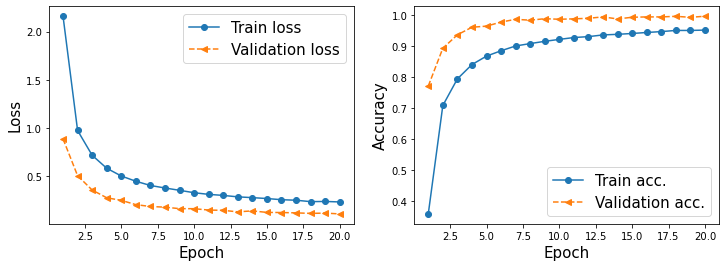

In [67]:
hist1 = history2.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

#### 分類test data並計算出accuracy

In [68]:
accuracy = classifier2.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7800/7800 [==============================] - 1s 79us/sample - loss: 0.1117 - accuracy: 0.9958
Accuracy:  0.9957692


### <font color=#0000FF>建立CNN model(最終版)</font>

#### 針對缺失(於discussion中探討)，進行以下修正。增加兩層convolution layer、一層pooling layer、一層dropout layer、一層BatchNormalization。

In [69]:
# build CNN model

classifier3 = tf.keras.Sequential()
classifier3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',
                      input_shape=(28,28,3),activation='relu', data_format='channels_last'))
classifier3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier3.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
classifier3.add(tf.keras.layers.Dropout(0.5))

classifier3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier3.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
classifier3.add(tf.keras.layers.Dropout(0.5))

classifier3.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier3.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier3.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

classifier3.add(tf.keras.layers.BatchNormalization())

classifier3.add(tf.keras.layers.Flatten())
classifier3.add(tf.keras.layers.Dropout(0.5))
classifier3.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
classifier3.add(tf.keras.layers.Dense(26, activation='softmax'))

classifier3.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 3, 3, 64)         

#### 訓練model

In [70]:
classifier3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = classifier3.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_valid, y_valid))

Train on 63180 samples, validate on 7020 samples
Epoch 1/20
63180/63180 [==============================] - 8s 127us/sample - loss: 2.0950 - accuracy: 0.3796 - val_loss: 0.9285 - val_accuracy: 0.7305
Epoch 2/20
63180/63180 [==============================] - 7s 108us/sample - loss: 0.8766 - accuracy: 0.7305 - val_loss: 0.3379 - val_accuracy: 0.9221
Epoch 3/20
63180/63180 [==============================] - 7s 108us/sample - loss: 0.5919 - accuracy: 0.8234 - val_loss: 0.2370 - val_accuracy: 0.9500
Epoch 4/20
63180/63180 [==============================] - 7s 110us/sample - loss: 0.4572 - accuracy: 0.8647 - val_loss: 0.1651 - val_accuracy: 0.9741
Epoch 5/20
63180/63180 [==============================] - 7s 108us/sample - loss: 0.3786 - accuracy: 0.8903 - val_loss: 0.1328 - val_accuracy: 0.9805
Epoch 6/20
63180/63180 [==============================] - 7s 107us/sample - loss: 0.3264 - accuracy: 0.9106 - val_loss: 0.1112 - val_accuracy: 0.9873
Epoch 7/20
63180/63180 [===========================

#### 繪製loss以及accuracy的曲線並觀察其隨epoch之變化

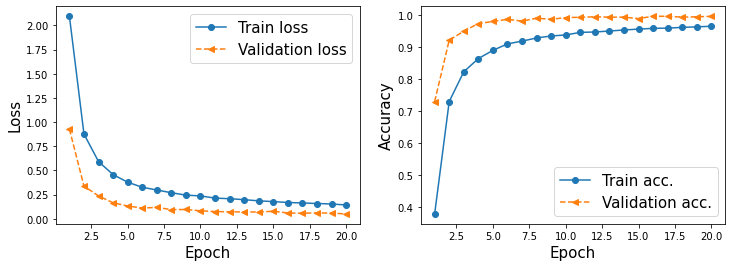

In [71]:
hist1 = history3.history
x_arr = np.arange(len(hist1['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist1['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist1['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

#### 分類test data並計算出accuracy

In [72]:
accuracy = classifier3.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7800/7800 [==============================] - 1s 98us/sample - loss: 0.0511 - accuracy: 0.9978
Accuracy:  0.9978205


#### 繪製confusion matrix

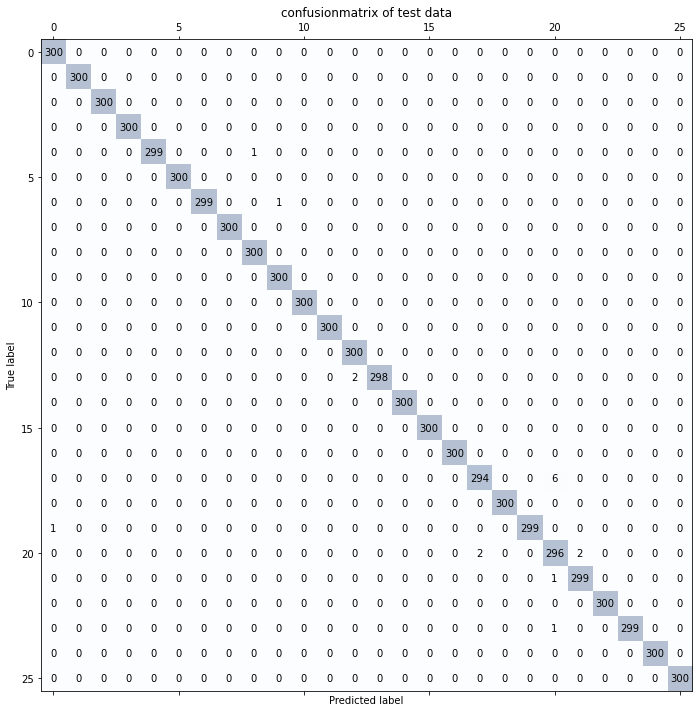

In [73]:
from sklearn.metrics import confusion_matrix

y_pred = classifier3.predict(X_test)

predict_labels = []
for pred in y_pred:
    predict_labels.append(np.argmax(pred))

confmat = confusion_matrix(y_true=y_test_temp, y_pred=predict_labels)

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('confusionmatrix of test data')
plt.tight_layout()
plt.show()

#### 轉換predict_labels之格式，變成numpy array

In [74]:
ypred = np.array(predict_labels)
ypred

array([14, 20, 13, ..., 13, 15,  0], dtype=int64)

#### 印出幾個分類錯誤的圖片出來看看

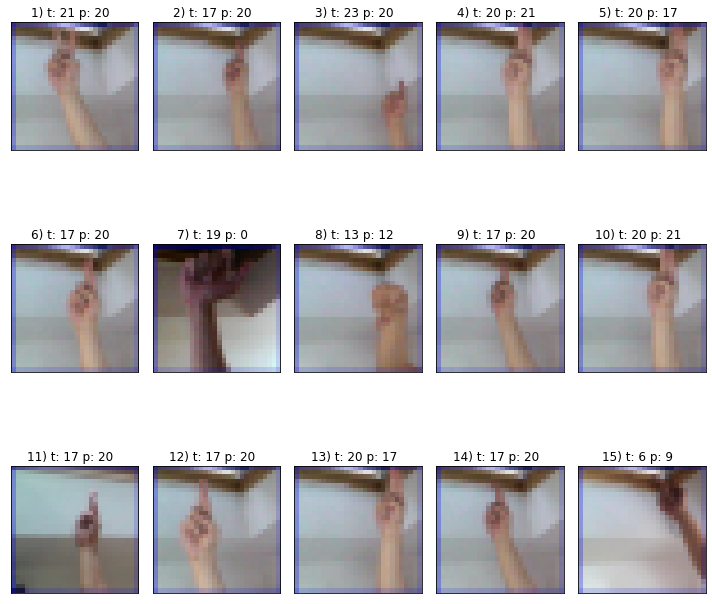

In [78]:
miscl_img = X_test[y_test_temp != ypred][:15]
correct_lab = y_test_temp[y_test_temp != ypred][:15]
miscl_lab = ypred[y_test_temp != ypred][:15]

fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True)
fig.set_size_inches(10,10)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(28, 28, 3)
    ax[i].imshow(img, interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d  ' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

#### 儲存最佳的model以便之後直接使用

In [79]:
classifier3.save('model_rgb.h5',
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

### <u>Discussion-RGB</u>

#### Data Preprocessing:
1.第一個問題是要怎麼一次讀取大量的圖片，我們的方法則是先將所有的圖片路徑都列出來，然後再一張一張讀進來，讀進來的同時，直接轉換成pixel並放進array裡面儲存。但是，cv2讀取進來的pixel會是以BGR的方式排列，並不是我們一般常見RGB形式，而將BGR轉為GRB以後，讀出去之後的圖片就不會有顏色上的問題。<br>
2.第二個問題，numpy在建立array的時候會是以浮點數的方式，而pixel是以整數的方式儲存，所以若要以numpy array來儲存轉換出來的pixel的話，要先將array的type轉換成整數形式。<br>
3.第三個問題，Dataframe在合併的時候，他的index是會依照原本DataFrame上的index去合併，所以在合併過後的DataFrame上面就有可能會出現重複的index，雖然是不影響操作，但是為了以防萬一，我們還是將這個問題給解決了。而我們的做法就是，將該DataFrame先轉換成一個numpy array，再轉換回DataFrame，這樣子index就會完全按照順序來了。<br>

#### Feature Scaling and Splitting:
1.將pixel都做normalization，讓值都落在0到1之間。<br>
2.這個dataset的數量基本上非常龐大，大約有10萬張圖片，每個字母大概都有幾千張不同光線、不同角度的圖片，為了要確保他有好的分辨能力，所以我們選擇了以9:1的比例去分割，我們讓train data的數量維持在6萬張左右，test data以及validation data大約都在7000張左右。<br>

#### Model Train and Evaluate:
1.classifier:<br>
　　這個model我們先放了兩個convolution layer(filter設定為16、32)、兩個pooling layer、一個dropout層以及一個hidden layer(神經元個數設定為128)，除了output那層的activation function是softmax以外，其他均為relu。訓練完這個model以後，觀察了一下loss以及accuracy的曲線，大致上沒有overfitting的現象，但是validation的曲線距離train的曲線明顯差距比灰階的更大了，後來仔細看了一下accuracy隨epoch的變化，我們發現在訓練model的過程中，train最後卡在80幾%就收斂了，但是validation在訓練model的過程中卻來到90幾%，這其中train的資料明顯精確度不夠高，分類的還不夠完全。
實際分類了一下test data，發現accuracy卻已經到達了96%。我們覺得有可能是因為pooling layer造成很多筆資料都被忽略過了。<br><br>
2.classifier1:<br>
　　有鑑於剛剛的情況，因此我們對這個model的修正就是一次做完兩個convolution layer，並減少一層pooling layer，其餘變因都不變。訓練完這個model以後，觀察了一下loss以及accuracy的曲線，大致上沒有overfitting的現象出現，而上述所提到的validation以及train距離也明顯減少了許多。實際分類了一下test data，發現這時候accuracy已經達到98%了，基本上已經達到一個很完善的地步。但是為了要使test分類出來的精確度能達到更準確，因此我們增加了model之複雜度。<br><br>
3.classifier2:<br>
　　有鑑於上述的情況，因此我們對這個model的修正就是，增加兩層convolution layer、一層pooling layer、一層dropout layer，其餘變因均不變。訓練完這個model以後，觀察了一下train data在訓練過程之accuracy隨著epoch的變化，比上一個model下降了一些些，而validation之曲線依然比train的曲線還要高。實際分類了一下test data，精確率達到99%，比之前的更好了，但為了要修正在訓練的過程中之精確度，因此我讓整體model的複雜度又再增加。<br><br>
4.classifier3:<br>
　　有鑑於上述的情況，因此我們對這個model的修正就是，再增加兩層convolution layer、一層pooling layer、一層dropout layer以及batchnormaliztion，其餘變因均不改變。訓練完這個model以後，觀察了一下loss以及accuracy的曲線，基本上還是維持validation比較好的情況。觀察了一下accuracy隨著epoch的變化，train data在訓練過程中的精確度明顯有提升，因此順利解決了這個問題。而實際分類了一下test data，accuracy已經達到了快要100%的情況。因此我們選擇了這個model作為我們要在real-time上分辨手勢的model。<br><br>
5.test data預測結果分析:<br>
　　我們實際印出了一下confusion matrix，我們發現只有少許幾個字母被分錯1-2筆資料，而當中被分類錯比較多的為"R、"U"這兩個字母。而也稍微印出了幾個例子來看看到底分類錯誤了甚麼，我們稍微歸納了一下，在RGB版本的model中，比較會被分類錯的會傾向於手指的細微變化，舉例來說像是手指的交叉與否，可能比較沒辦法辨識出來，但是拳頭類的英文字母明顯被分類正確了，幾乎沒有錯誤。<br><br>
6.loss以及accuracy曲線:<br>
　　至於為什麼與灰階一樣會有validation的曲線高於accuracy曲線的這種現象呢?我們覺得原因是相同的，可能是因為train data的量相當龐大、dropout layer的位置，以及其他相關的regularization才導致這種情況，但本身並不影響model的效能。

### <font color=#0000FF>Real-time之辨識</font>

#### 將先前存好的model載入直接使用

In [3]:
classifier_new1 = tf.keras.models.load_model('model_rgb.h5')

#### 建立儲存擷取影像的list及儲存model預測結果的list

In [6]:
realtime_pic1=[]
realtime_pred1=[]

#### 1.使用opencv套件開啟筆電鏡頭
#### 2.每0.1秒截一張圖fps=10(鏡頭影像有經過crop處理以縮小影像範圍)
#### 3.每五秒將一張截圖轉RGB pixel、resize、normalize、丟入model中進行預測，並及時印出影像及預測結果，另外，將影像及結果丟入list中儲存
#### 4.按q時關閉筆電鏡頭

U


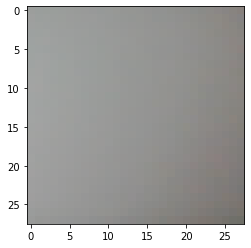

U


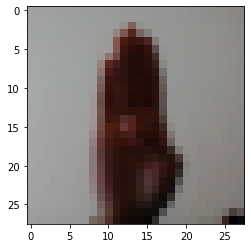

B


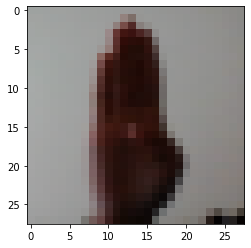

V


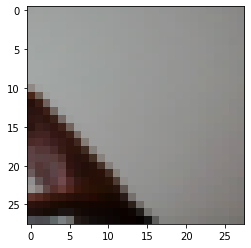

C


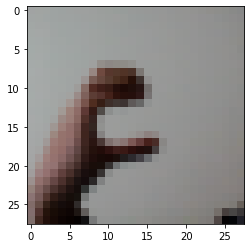

D


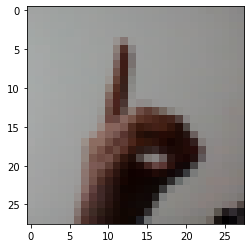

D


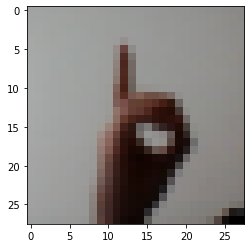

S


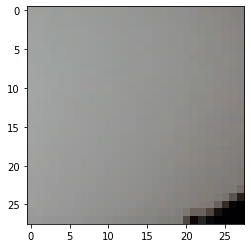

F


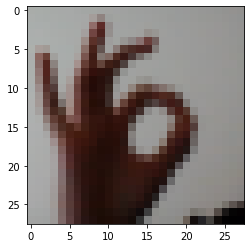

S


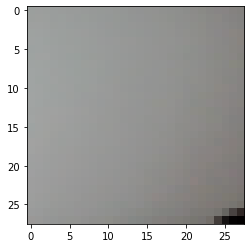

V


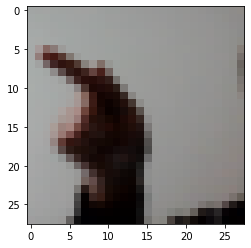

G


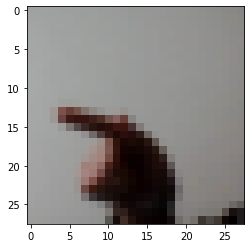

S


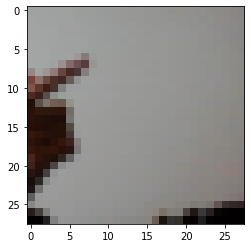

G


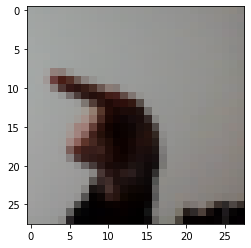

H


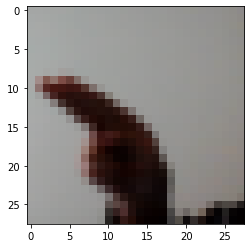

I


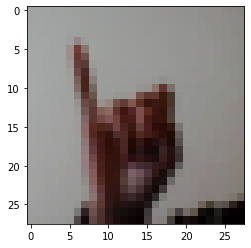

J


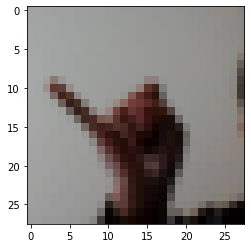

V


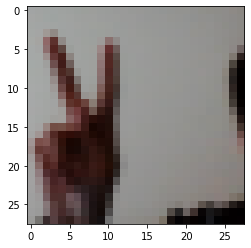

W


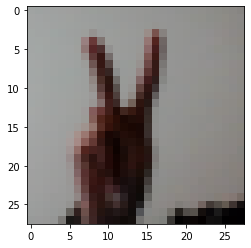

L


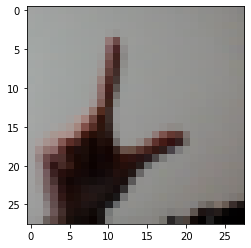

M


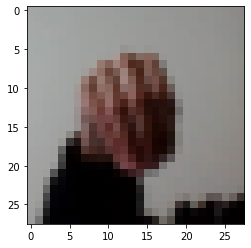

N


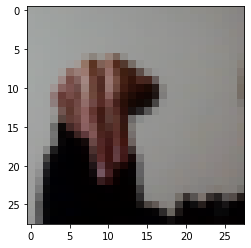

O


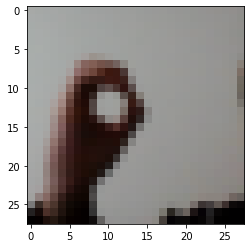

Y


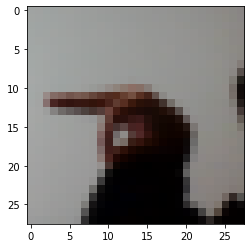

N


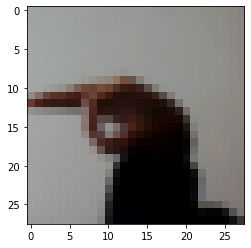

P


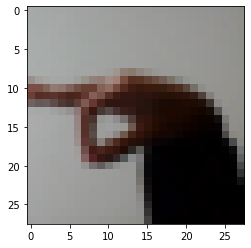

S


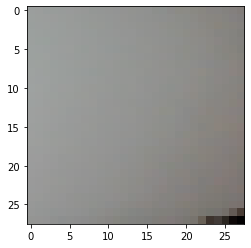

Q


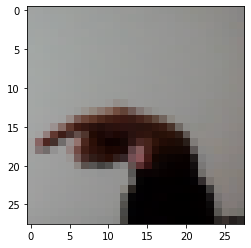

X


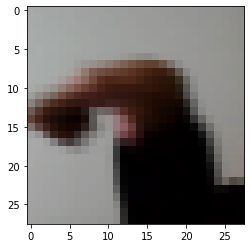

O


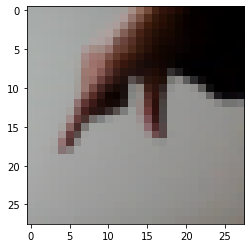

R


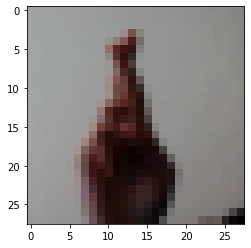

T


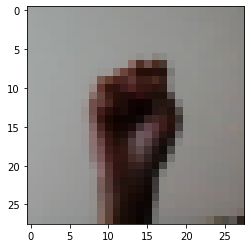

S


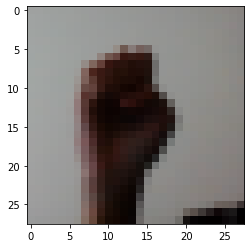

T


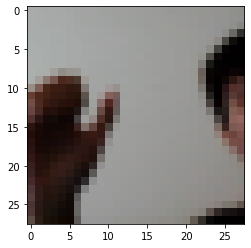

T


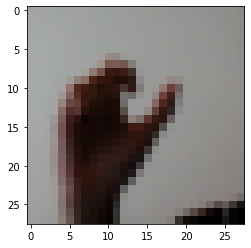

U


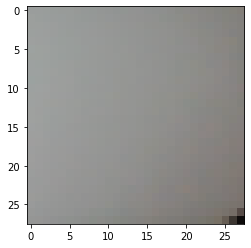

U


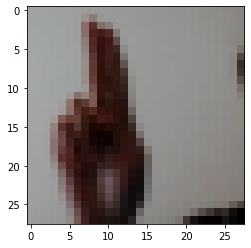

V


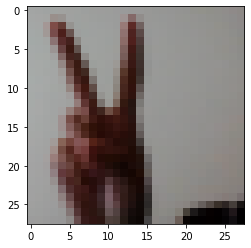

W


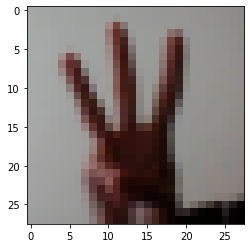

U


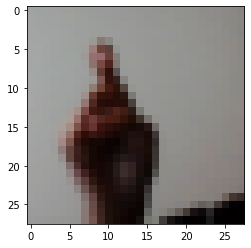

U


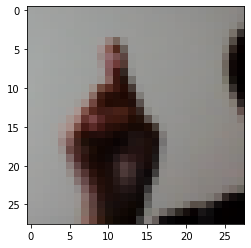

R


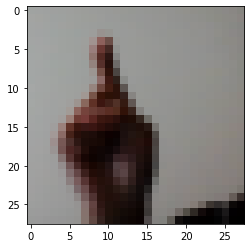

R


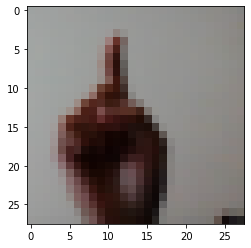

R


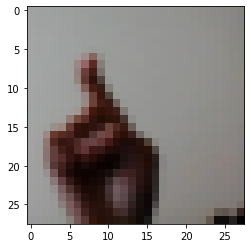

X


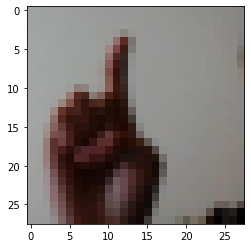

Y


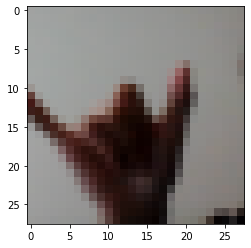

Z


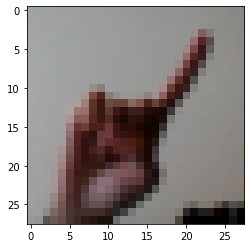

E


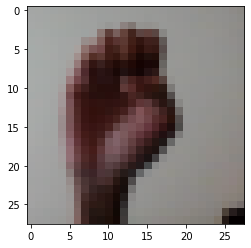

<function destroyAllWindows>

In [7]:
import cv2

cap = cv2.VideoCapture(0)
count = int(0)

def crop_image(image, x, y, width, height):
    return image[y:y + height, x:x + width]

while(True):
    ret, frame = cap.read()
    frame = crop_image(frame, 300,180,300,300)
    if ret:
        cv2.imshow('frame', frame)
        cv2.waitKey(100)
    if count % 50 ==0:
        temp=frame
        temp2=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        temp2 =cv2.GaussianBlur(temp2, (15,15), 0)
        img = cv2.resize(temp2, (28,28) , interpolation=cv2.INTER_AREA)
        img2 = img.reshape((1,28,28,3))
        realtime_pic1.append(img)
        img3 = img2/255
        pred = classifier_new1.predict_classes(img3)
        realtime_pred1.append(chr(pred+65))
        print(chr(pred+65))
        plt.imshow(img)
        plt.show()
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
    count+=1
    
cap.release()
cv2.destroyAllWindows


#### 建立儲存擷取影像的list及儲存model預測結果的list

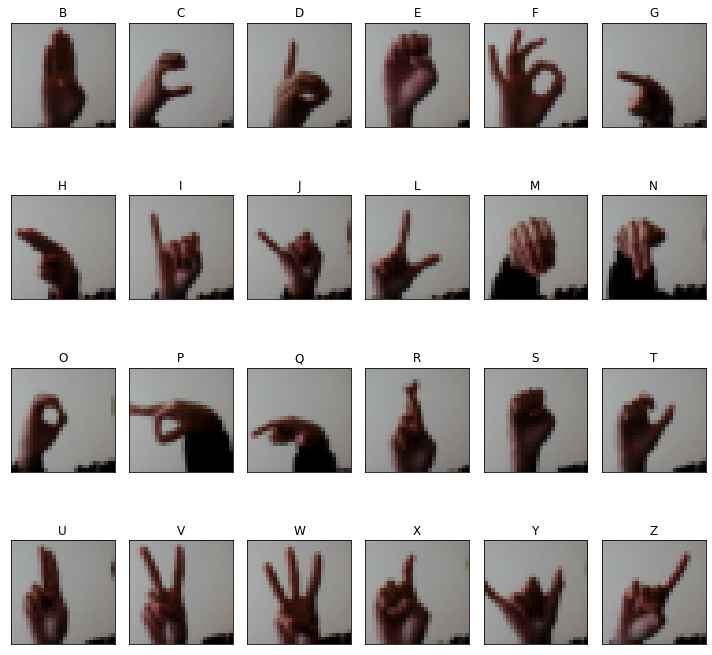

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=6, sharex=True, sharey=True,)
fig.set_size_inches(10,10)
ax = ax.flatten()
ax[0].imshow(realtime_pic1[2])
ax[0].set_title(realtime_pred1[2])
ax[1].imshow(realtime_pic1[4])
ax[1].set_title(realtime_pred1[4])
ax[2].imshow(realtime_pic1[5])
ax[2].set_title(realtime_pred1[5])
ax[3].imshow(realtime_pic1[47])
ax[3].set_title(realtime_pred1[47])
ax[4].imshow(realtime_pic1[8])
ax[4].set_title(realtime_pred1[8])
ax[5].imshow(realtime_pic1[11])
ax[5].set_title(realtime_pred1[11])
ax[6].imshow(realtime_pic1[14])
ax[6].set_title(realtime_pred1[14])
ax[7].imshow(realtime_pic1[15])
ax[7].set_title(realtime_pred1[15])
ax[8].imshow(realtime_pic1[16])
ax[8].set_title(realtime_pred1[16])
ax[9].imshow(realtime_pic1[19])
ax[9].set_title(realtime_pred1[19])
ax[10].imshow(realtime_pic1[20])
ax[10].set_title(realtime_pred1[20])
ax[11].imshow(realtime_pic1[21])
ax[11].set_title(realtime_pred1[21])
ax[12].imshow(realtime_pic1[22])
ax[12].set_title(realtime_pred1[22])
ax[13].imshow(realtime_pic1[25])
ax[13].set_title(realtime_pred1[25])
ax[14].imshow(realtime_pic1[27])
ax[14].set_title(realtime_pred1[27])
ax[15].imshow(realtime_pic1[30])
ax[15].set_title(realtime_pred1[30])
ax[16].imshow(realtime_pic1[32])
ax[16].set_title(realtime_pred1[32])
ax[17].imshow(realtime_pic1[34])
ax[17].set_title(realtime_pred1[34])
ax[18].imshow(realtime_pic1[36])
ax[18].set_title(realtime_pred1[36])
ax[19].imshow(realtime_pic1[37])
ax[19].set_title(realtime_pred1[37])
ax[20].imshow(realtime_pic1[38])
ax[20].set_title(realtime_pred1[38])
ax[21].imshow(realtime_pic1[44])
ax[21].set_title(realtime_pred1[44])
ax[22].imshow(realtime_pic1[45])
ax[22].set_title(realtime_pred1[45])
ax[23].imshow(realtime_pic1[46])
ax[23].set_title(realtime_pred1[46])
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

### <u>Discussion-RGB(Real-time)</u>
由以上結果可以發現當我們換成RGB後訓練出來的模型可以辨別出22種我們自己比的字母，只剩下兩種(A、K)無法辨認，我們認為相較於灰階而言，彩圖能有提升的原因在於R、G、B三個channel的存在能夠將手指細部變化呈現的更好、而不是灰階圖片單純只是用輪廓當判斷依據，這樣的結果也與我們事先預期相同。<br>
然而仍然還有兩種字母無法辨認出來，這部分應該還是與先前分析的相同，是外在環境的不同及模型的局限度太大所造成。不過這樣的結果我們認為已經相當不錯了、有不錯的效能。除此之外，我們還發現RGB的model相較於灰階而言對背景的容忍度似乎更高，使用灰階的model時背景必須要是乾淨的白牆才能夠分得好，但是RGB的model對於背景的要求就沒有那麼高，我們認為原因應該在於在使用RGB訓練的過程中model不僅學會手指的輪廓，它還學會分辨手指的顏色，如此一來就比較能容忍其他不相干物品的出現。

## <font color=#FF0000>Discussion(ALL)</font>
1.灰階(Gray)與彩色(RGB)之比較: <br>
在實作前我們就已評估彩色data的訓練上會比灰階來得難，但是可達到的效能上限也會更高。從我們的實作結果也能發現這樣的趨勢，首先，灰階的部分從我們訓練出的最佳model可以發現只加了兩層convolution layer就能達到99.26%的test accuracy，如果讓模型再更複雜的話也很難再有提升；而彩色的部分同樣從我們訓練出的最佳model可發現convolution layer加到了6層而達到99.78%的test accuracy。從這兩者比較就可發現，彩色data的訓練明顯較難，因為input的變數量變成了三倍，資料的複雜量增加也理所當然需要更大的計算複雜度才能達到好的效果，最後，由準確度也能發現彩色data訓練出來的模型準確度有所提升，因為相較於Gray一個channel的資料，RGB有三個channel可以把每一張圖片表示得更明確。<br>
2.Dataset資料與Real-time分類之比較: <br>
如先前所提到，由於dataset中的資料變異性較低，所以把用dataset訓練出的模型拿來做real-time的預測時會很容易受到外在環境的影響。除此之外，我們還發現在convolution layer數目比較少的情況下，以及分類test data之accuracy並沒有達到98%-100%這個範圍內的話，就算分類test data再準確，real-time的辨識會大幅度受影響，因而很多分類錯誤。因此在不使model過於複雜的前提下，適當的增加convolution layer數目，巧妙的運用pooling layer以及dropout layer，就能夠提升real-time辨識的準確度。<br>
3.模型改善的可能方法:<br>
從以上分析就能夠知道dataset的分類與real-time圖片的分類完全是兩回事，real-time的分類對於模型的要求會更高，所以如果要提高real-time的效能，我們可以透過讓dataset更加多樣化的方法來提升real-time的準確度，例如:增加data風格種類、用Online learning的方法修正模型、或是把圖片的解析度從28X28再提高。以上的方法理論上都有機會讓模型的能力更加強大，但是也必須花費更多心力，如:自己生成dataset並做label的標記、data的變異性增加而造成需要更複雜更大運算量的模型來配合，同時也增加traning時hyperparameters tuning的困難度。

## <font color=#FF0000>心得</font>
　　這次做final project的過程中，我們前前後後其實換過不少題目。最開始是想要實作年齡辨識的部分，但是又覺得好像跟課本上的範例差不多，於是又改成想要做圖片風格轉換，我們也確實做出了一點點的東西出來，但是由於GAN我們不太熟悉，生成出來的東西有一定的極限在，因此又改了題目。最後想到了這個題目，把在電腦上訓練過後的model實際運用到現實世界中，讓我們能夠直接與程式互動，看見他的分類過程以及準確與否。在做這個題目的過程當中，也學到了許多新的套件的使用方式，以及對影像處理更有經驗，使我們大有收穫!由於期末時間有限，我們並沒有辦法直接針對real-time的部分做改良，因為光是自己生成多種背景、光線的dataset並標記label就會花掉許多時間，這是我們覺得比較可惜的部分，未來如果我們還有機會把這個題目繼續改良的話我們相信它還能有很多發揮空間的。<br>
　　由於這是我們第一次接觸機器學習的領域，也是第一次使用Python來寫程式，一開始在寫作業的時候會比較吃力，需要花時間去尋找自己想要用的指令，以及套件。然而讓我們很訝異的一件事情是，Python多了很多現成可以使用的套件，就不用自己去寫程式來做出那種功能，這是相較於之前寫程式比較不同的地方。而經過了這堂課以後，我們真的是收穫良多，從一開始的傳統演算法開始學起，一路學到神經網路的演算法。在這過程之中，了解背後的運作原理，並且用數學去涵蓋這部分，算是對題目的理解、模型之設計、模型訓練以及模型之效能分析有大致上的認知了，能從我們所學的東西去判斷這個模型之好壞以及是否有達到我們預期的結果。也順便練習了一下Python的語法，讓我們又多學習了一個新的技能，相信在經過這堂課之後，我們之後遇到問題的時候可以利用所學的方法去解決，感謝老師的用心指導。